## Homework

Сразу импортирую необходимое:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy import stats
from scipy.integrate import quad # Для задания 6
from itertools import permutations
import pandas as pd # Только для того, чтобы красиво вывести значения в задании 9!
import math

plt.rcParams['figure.dpi'] = 300  # Устанавливаем высокое разрешение по умолчанию

### Problem 1
Implement serial test and apply to a `samples`

In [2]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = np.array([rng() for _ in range(1000)])

#### Решение

In [3]:
def serial_test(sample, series_length, k):
    sampledd = np.array([sample[i:i + series_length] for i in range(0, len(sample), series_length)])
    edges = [np.linspace(0, 1, k + 1) for _ in range(series_length)]

    f_obs = np.histogramdd(sampledd, bins=edges)[0]
    # print(f'Observed:\n{f_obs}')
    f_exp = np.full_like(f_obs, fill_value=len(sampledd) / k**series_length, dtype=float)
    # print(f'Expected:\n{f_exp}')

    _, p_value = stats.chisquare(f_obs.ravel(), f_exp.ravel())

    return p_value

Примеры использования:

In [4]:
p_value = serial_test(samples, series_length=2, k=5) # Для samples
print(f'P-value: {p_value}')

P-value: 0.6090827152142755


In [5]:
samples2 = np.array([rng() for _ in range(1200)])
p_value = serial_test(samples2, series_length=3, k=4)
print(f'P-value: {p_value}')

P-value: 0.8412204711732177


### Problem 2*
Implement permutation test and apply to a `samples`

In [6]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

samples = np.array([rng() for _ in range(1000)])

#### Решение

In [7]:
def permutation_test(sample, series_length):
    sampledd = np.array([sample[i:i + series_length] for i in range(0, len(sample) - series_length + 1)])
    
    all_perms = list(permutations(range(series_length)))
    perm_counts = {perm: 0 for perm in all_perms}

    for smpl in sampledd:
        perm = tuple(np.argsort(smpl))
        perm_counts[perm] += 1

    f_obs = np.array(list(perm_counts.values()))
    # print(f'Observed:\n{f_obs}')
    f_exp = np.full_like(f_obs, fill_value=len(sampledd) / len(all_perms), dtype=float)
    # print(f'Expected:\n{f_exp}')
    
    _, p_value = stats.chisquare(f_obs, f_exp)
    
    return p_value

Примеры использования:

In [8]:
p_value = permutation_test(samples, series_length=4) # Для samples
print(f"P-value: {p_value}")

P-value: 0.8921724114003039


### Problem 3

Provide a statistical test to show that `rng_bad` has problems but `rng_good` does not.

In [9]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1


def rng_good(m=2**32, a=1103515245, c=12345):
    rng_good.current = (a * rng_good.current + c) % m
    return rng_good.current / m
rng_good.current = 1

#### Решение

In [10]:
bad_numbers = [rng_bad() for _ in range(10000)]
good_numbers = [rng_good() for _ in range(10000)]

def ks_test(samples):
    _, p_value = stats.kstest(samples, 'uniform')
    return p_value

def chi_square_test(samples):
    f_obs = np.histogram(samples, bins=50, range=(0, 1))[0]
    f_exp = np.full_like(f_obs, fill_value=f_obs.sum() / len(f_obs), dtype=float)

    _, p_value = stats.chisquare(f_obs, f_exp)
    return p_value

bad_ks_p_value = ks_test(bad_numbers)
good_ks_p_value = ks_test(good_numbers)
bad_chi2_p_value = chi_square_test(bad_numbers)
good_chi2_p_value = chi_square_test(good_numbers)
bad_serial_p_value = serial_test(bad_numbers, series_length=2, k=20)
good_serial_p_value = serial_test(good_numbers, series_length=2, k=20)
bad_permutation_p_value = permutation_test(bad_numbers, series_length=4)
good_permutation_p_value = permutation_test(good_numbers, series_length=4)

print(f"Kolmogorov-Smirnov P-value for BAD: {bad_ks_p_value}")
print(f"Kolmogorov-Smirnov P-value for GOOD: {good_ks_p_value}")
print(f"\nChi-squared P-value for BAD: {bad_chi2_p_value}")
print(f"Chi-squared P-value for GOOD: {good_chi2_p_value}")
print(f"\nSerial test P-value for BAD: {bad_serial_p_value}")
print(f"Serial test P-value for GOOD: {good_serial_p_value}")
print(f"\nPermutation test P-value for BAD: {bad_permutation_p_value}")
print(f"Permutation test P-value for GOOD: {good_permutation_p_value}")


Kolmogorov-Smirnov P-value for BAD: 0.8113419470797671
Kolmogorov-Smirnov P-value for GOOD: 0.6860708686561302

Chi-squared P-value for BAD: 0.7029057761961921
Chi-squared P-value for GOOD: 0.6351778579197113

Serial test P-value for BAD: 0.8992891441226352
Serial test P-value for GOOD: 0.8776417239155498

Permutation test P-value for BAD: 0.06204655474900324
Permutation test P-value for GOOD: 0.4314695418241044


### Problem 4
Simulate a sample of 1000 from a discrete distribution on a set of digits $0, 1, 2, \ldots, 9$ with weights $0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2$. Construct a histogram from the sample. Optimise the algorithm by ordering the weights.

#### Решение

Чтобы получить случайную величину с искомым распределением, положим

$$X\,=\,\sum_{k\,=\,0}^{9}{k \cdot \mathbb{I}_{[x_k,\,x_{k+1}]}},$$

где $\{x_i\}_{i\,=\,0}^{10}$ - разбиение отрезка $[0, 1]$, соответствующее весам $0.12,\,0.3,\,0.167,\,0.24,\,0.31,\,0.54,\,0.111,\,0.02,\,0.001,\,0.2$.

Проще говоря, скажем, что выпала цифра $k$, если число, сгенерированное `np.random.rand()`, попало в соответствующий промежуток отрезка $[0,\,1]$.

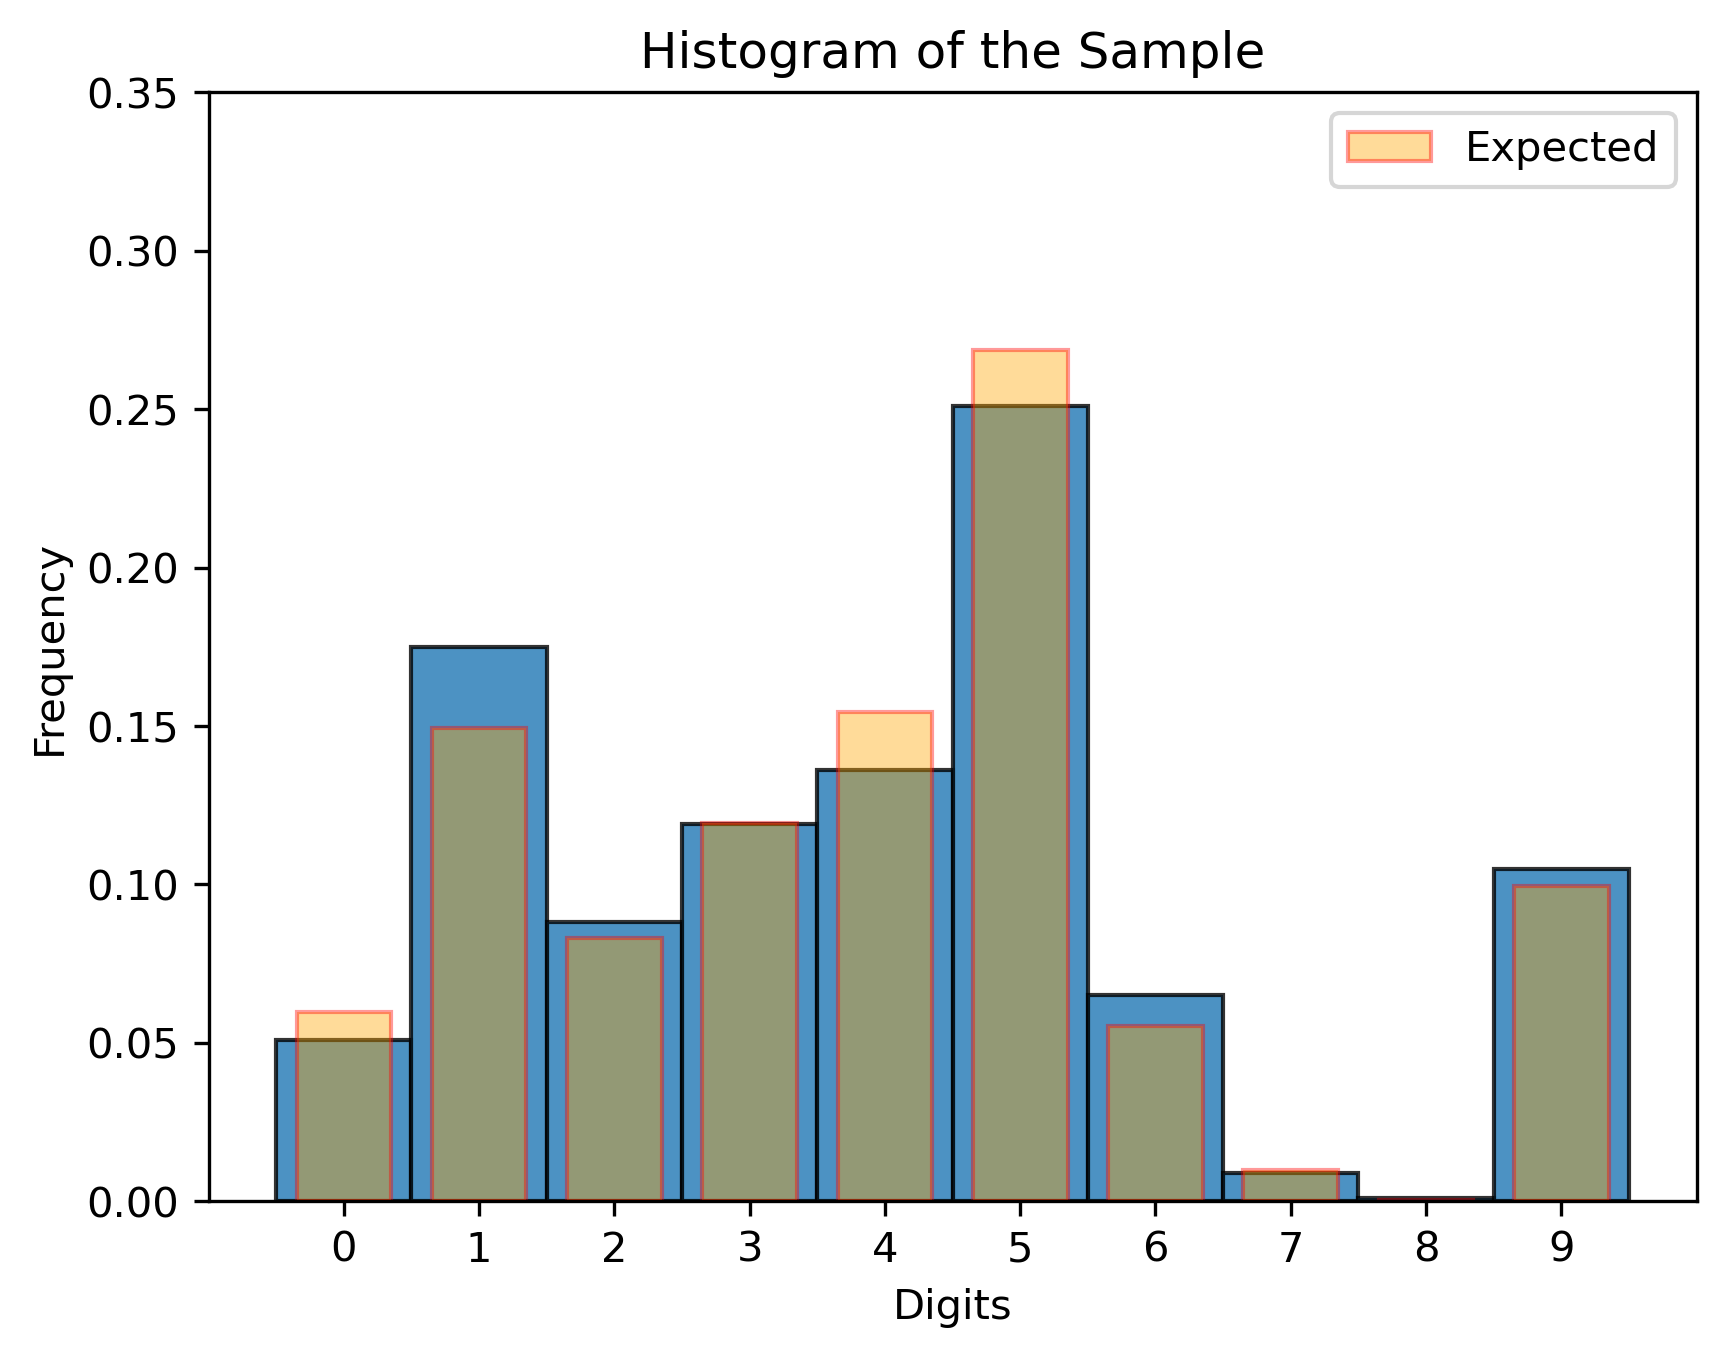

In [11]:
def generate_from_distribution(values, p, quantity):
    if len(values) != len(p):
        raise ValueError("The length of 'values' must be equal to the length of 'p'")
    
    p /= sum(p)

    partition = [sum(p[:i]) for i in range(len(p))]
    partition.append(1.0)

    sample = np.zeros(quantity)
    nums = np.random.rand(quantity)
    
    for i in range(quantity):
        for j in range(len(p)):
            if partition[j] <= nums[i] <= partition[j+1]:
                sample[i] = values[j]
    
    return sample

digits = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
weights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])

sample = generate_from_distribution(digits, weights, 1000)

plt.hist(sample, bins=np.arange(11) - 0.5, edgecolor='black', density=True, alpha=0.8)
plt.bar(digits, weights / sum(weights), label=f'Expected', width=0.7, color='orange', edgecolor="red", alpha=0.4)

plt.xticks(range(10))
plt.yticks(np.arange(0.0, 0.35 + 0.05, 0.05))
plt.xlabel('Digits')
plt.ylabel('Frequency')
plt.title('Histogram of the Sample')
plt.legend()
plt.show()

Но, поскольку вероятности выпадения конкретной цифры неодинаковы, алгоритм будет работать быстрее, если массив $\text{weights}$ будет изначально отсортирован по убыванию, т.к. это позволит быстрее находить нужный промежуток.

In [12]:
%timeit generate_from_distribution(digits, weights, 10000)

sorted_ind = np.argsort(weights)[::-1]
sorted_digits = digits[sorted_ind]
sorted_weights = weights[sorted_ind]

%timeit generate_from_distribution(sorted_digits, sorted_weights, 10000)

19.4 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
18.1 ms ± 64.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Problem 5
Simulate a sample of size 1000 from the distribution $\operatorname{Exp}(\lambda)$ using the Inverse transform method. Construct a sample histogram and an accurate plot of the distribution density.

#### Решение

Для экспоненциального распределения $\operatorname{Exp}(\lambda)$, функция распределения имеет вид:

$$F(x) = 1 - e^{-\lambda x}$$

Обратная функция будет:

$$F^{-1}(\xi) = -\frac{1}{\lambda}\operatorname{ln}(1-\xi)$$

Так как $\xi$ - случайная величина с равномерным распределением на $[0,\,1]$, можно заменить $1-\xi$ просто на $\xi$.

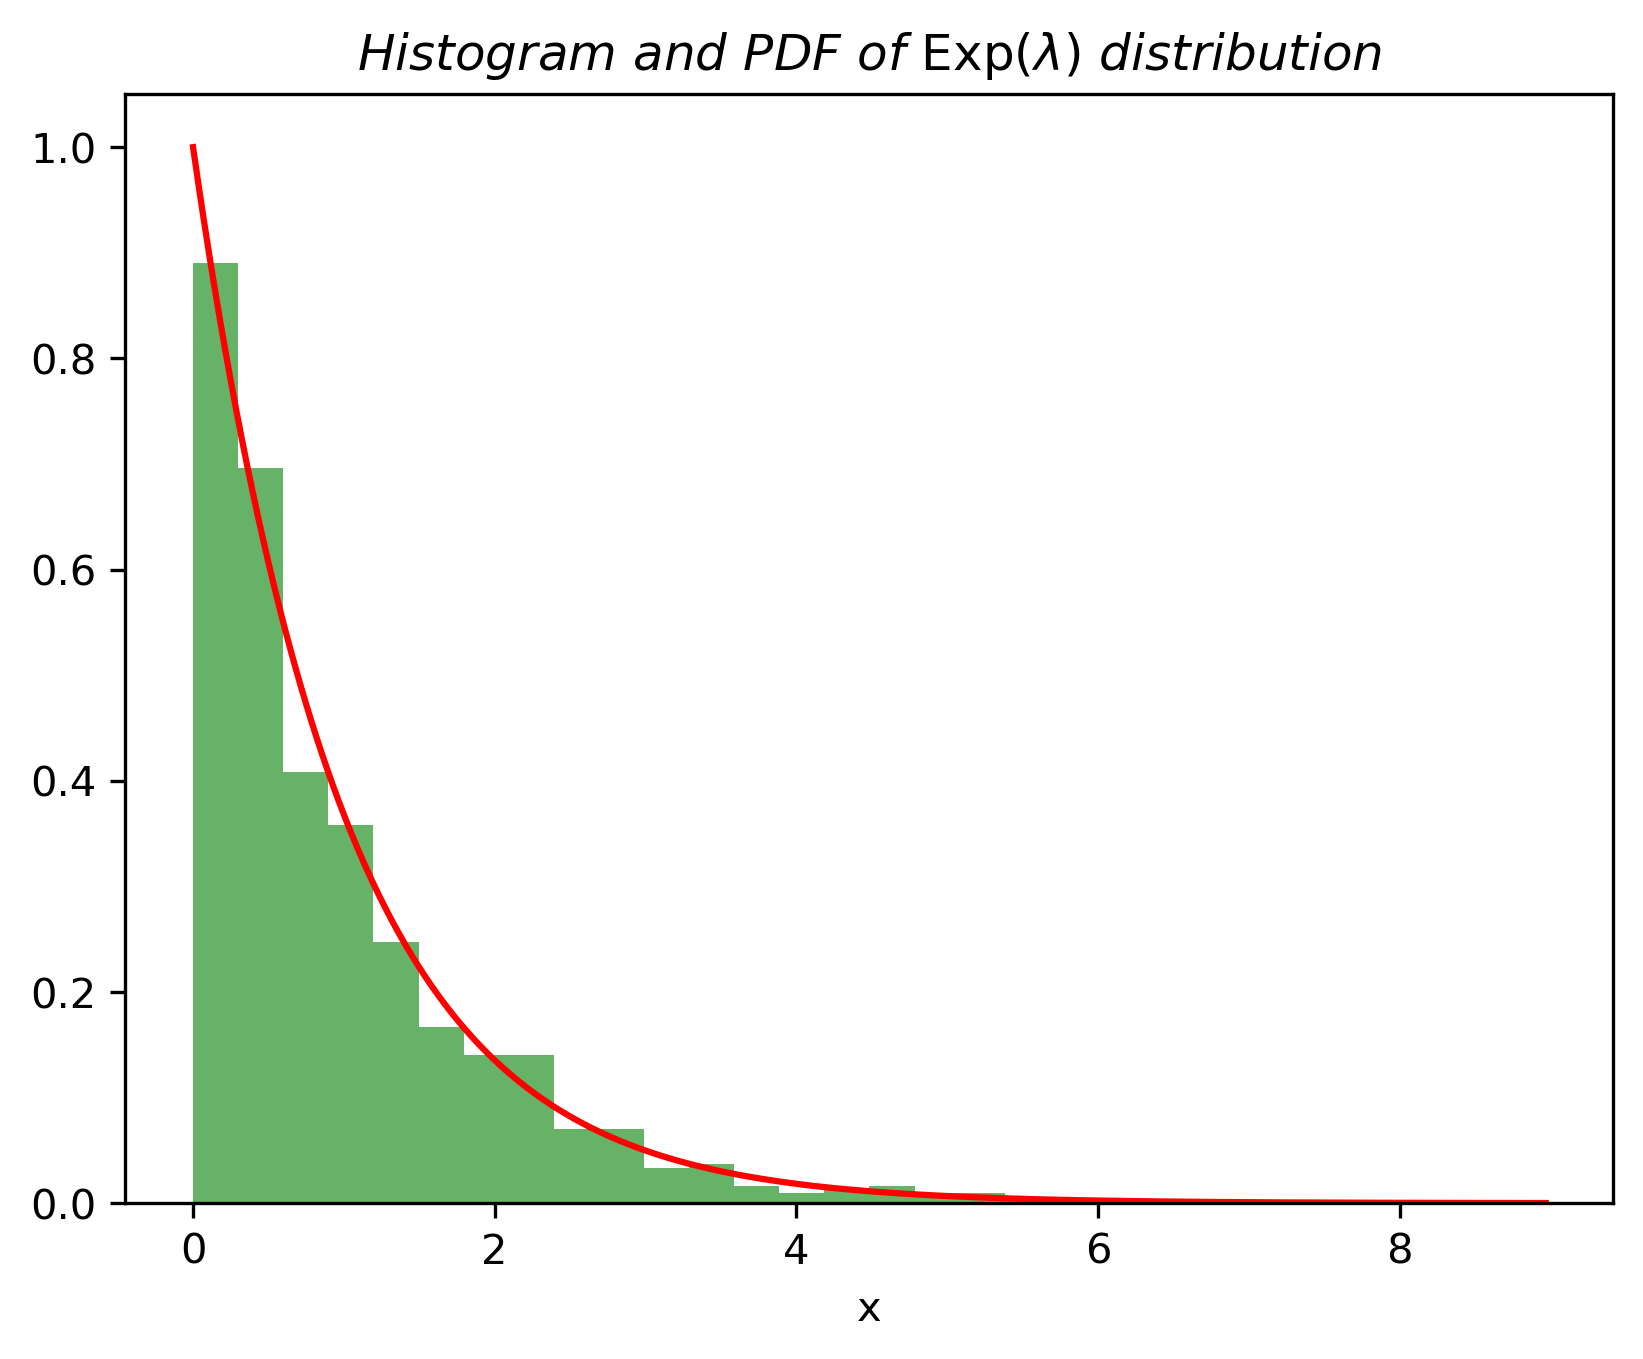

In [13]:
lambda_ = 1.0
uniform_samples = np.random.rand(1000)
exp_samples = -np.log(uniform_samples) / lambda_

plt.hist(exp_samples, bins=30, density=True, alpha=0.6, color='g')
x = np.linspace(0, max(exp_samples), 1000)
plt.plot(x, lambda_ * np.exp(-lambda_ * x), color='r')

plt.title(r'$Histogram\ and\ PDF\ of\ \operatorname{Exp}(\lambda)\ distribution$')
plt.xlabel('x')
plt.show()

### Problem 6
Justify (orally) that the accept-reject method really samples from the required distribution. Simulate $1000$ points from the distribution with density $e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$. Plot the sampled histogram on the sample and compare it with the plot of the exact density function.

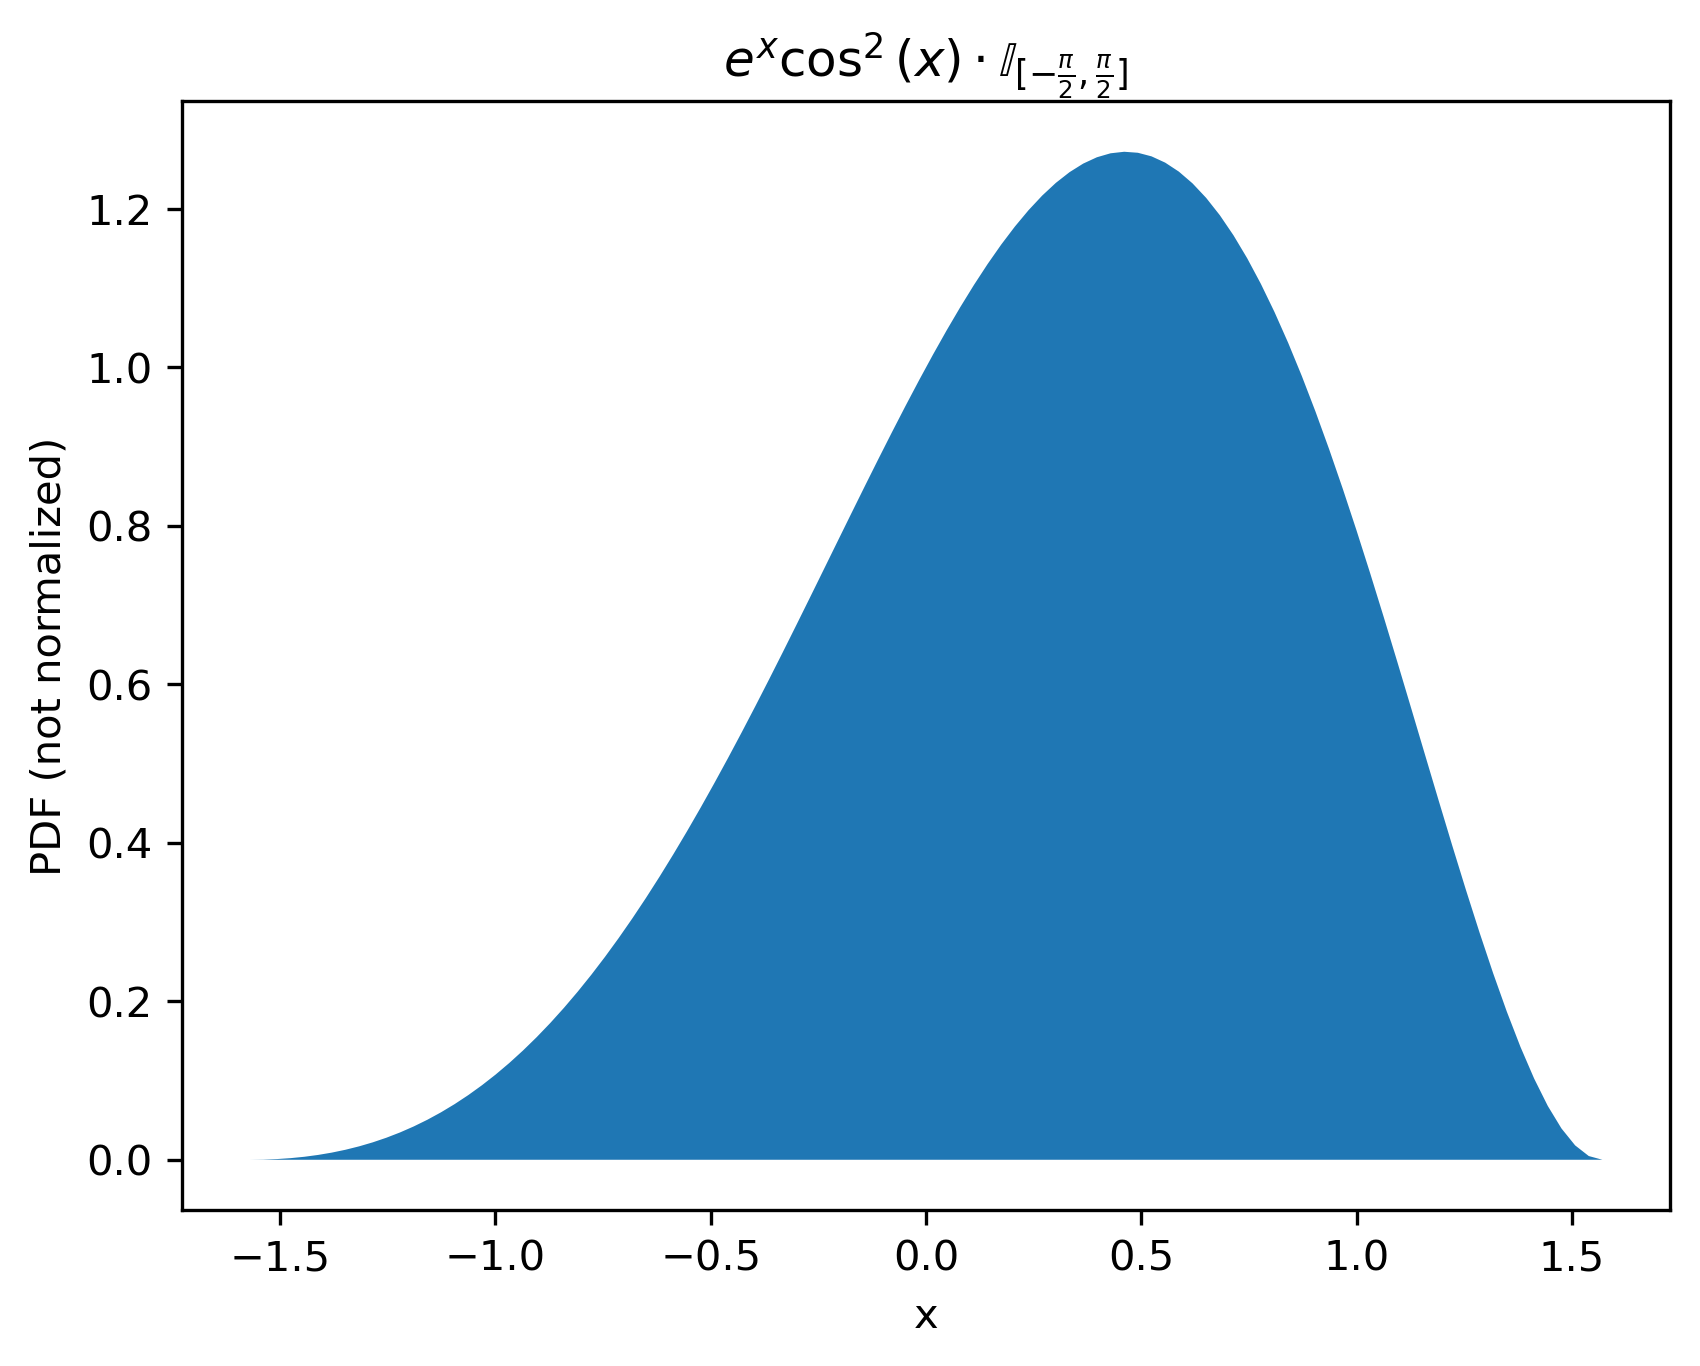

In [14]:
fig = plt.figure()

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x) * np.cos(x) ** 2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.title(r'$e^x \cos^2(x) \cdot \mathbb{I}_{[-\frac{\pi}{2}, \frac{\pi}{2}]}$')

plt.show()

#### Решение

Я буду выражаться в обозначениях, как [здесь](https://en.wikipedia.org/wiki/Rejection_sampling).

По условию

$$f(x) = e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$$

В качестве $g(x)$ возьмём функцию плотности распределения $U(-\frac\pi2, \frac\pi2)$, т.е.

$$g(x) \equiv \frac{1}{\pi} \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$$

Мы должны потребовать, чтобы $f(x) \lt M\cdot g(x)$, $\forall\ x \in [-\frac\pi2, \frac\pi2]$, поэтому положим

$$M \equiv \max\limits_{x \in [-\frac\pi2,\,\frac\pi2]} \frac{f(x)}{g(x)}$$

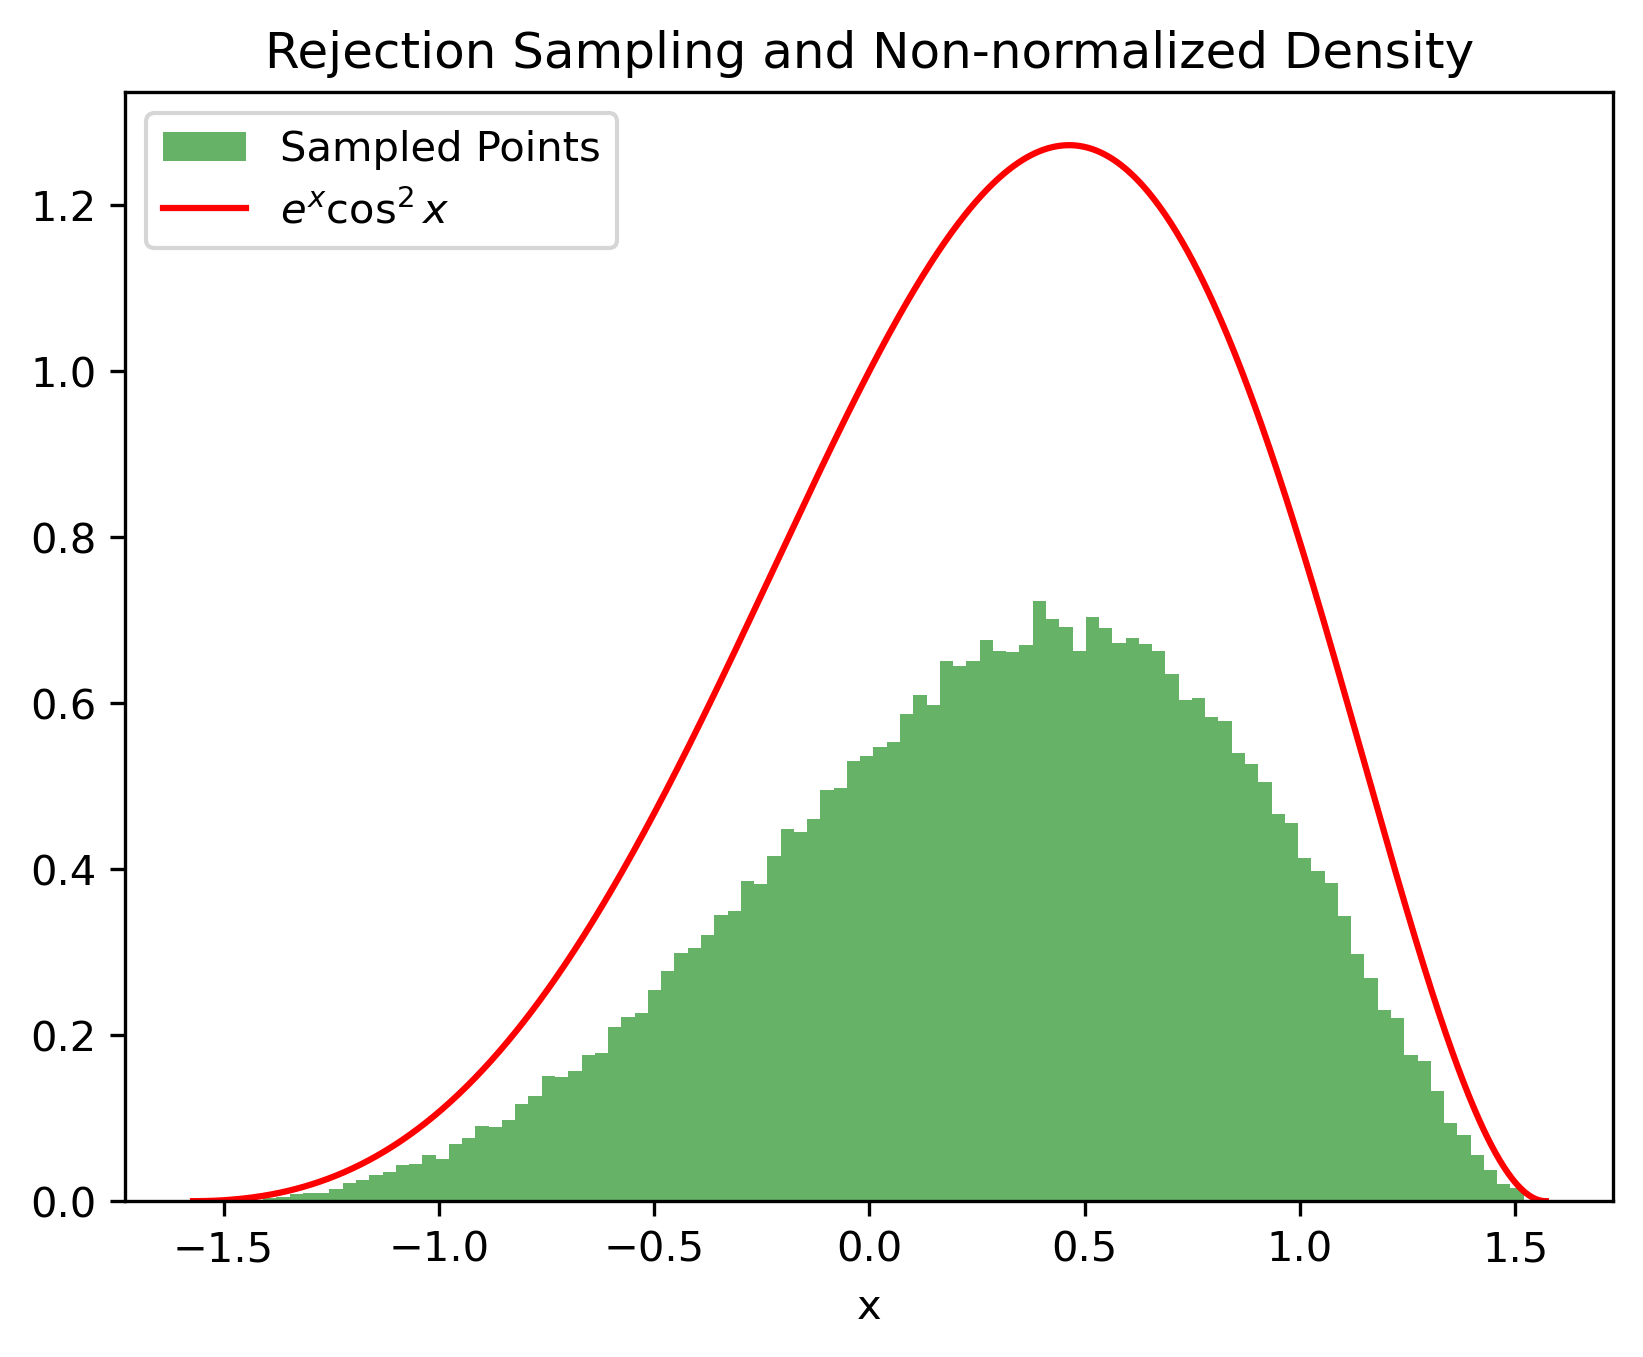

In [15]:
# Область определения
l_lim = -np.pi / 2.0
r_lim = np.pi / 2.0

def f(x):
    return np.exp(x) * np.cos(x)**2

def g(x):
    return 1.0 / np.pi

x_values = np.linspace(l_lim, r_lim, 1000)
M = np.max(f(x_values) / g(x_values))

def rejection_sampling(quantity):
    samples = []

    while len(samples) < quantity:
        x = np.random.uniform(l_lim, r_lim)
        y = np.random.uniform(0, 1) * M * g(x)
        if y < f(x):
            samples.append(x)
    
    return np.array(samples)

samples = rejection_sampling(100000)

plt.hist(samples, bins=100, density=True, label='Sampled Points', color='g', alpha=0.6)
plt.plot(x_values, f(x_values), label=r'$e^x \cos^2x$', color='r')

plt.xlabel('x')
plt.title('Rejection Sampling and Non-normalized Density')
plt.legend()
plt.show()

Мы видим, что форма гистограммы имеет некоторое сходство с $f(x) = e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}$.

Но ведь $f(x)$ на самом деле не является функцией плотности. Для этого нормализуем её, т.е. если

$$\int_{-\frac\pi2}^{\frac\pi2}{e^xcos^2x\ dx} = C,$$

то положим

$$f_\text{norm}(x) = \frac{e^xcos^2x \cdot \mathbb{I}_{[-\frac\pi2, \frac\pi2]}}{C}$$

In [16]:
normalization_constant, _ = quad(f, l_lim, r_lim)

def f_norm(x):
    return f(x) / normalization_constant

Теперь выведем гистограмму с $f_\text{norm}(x)$ и посмотрим, что получится.

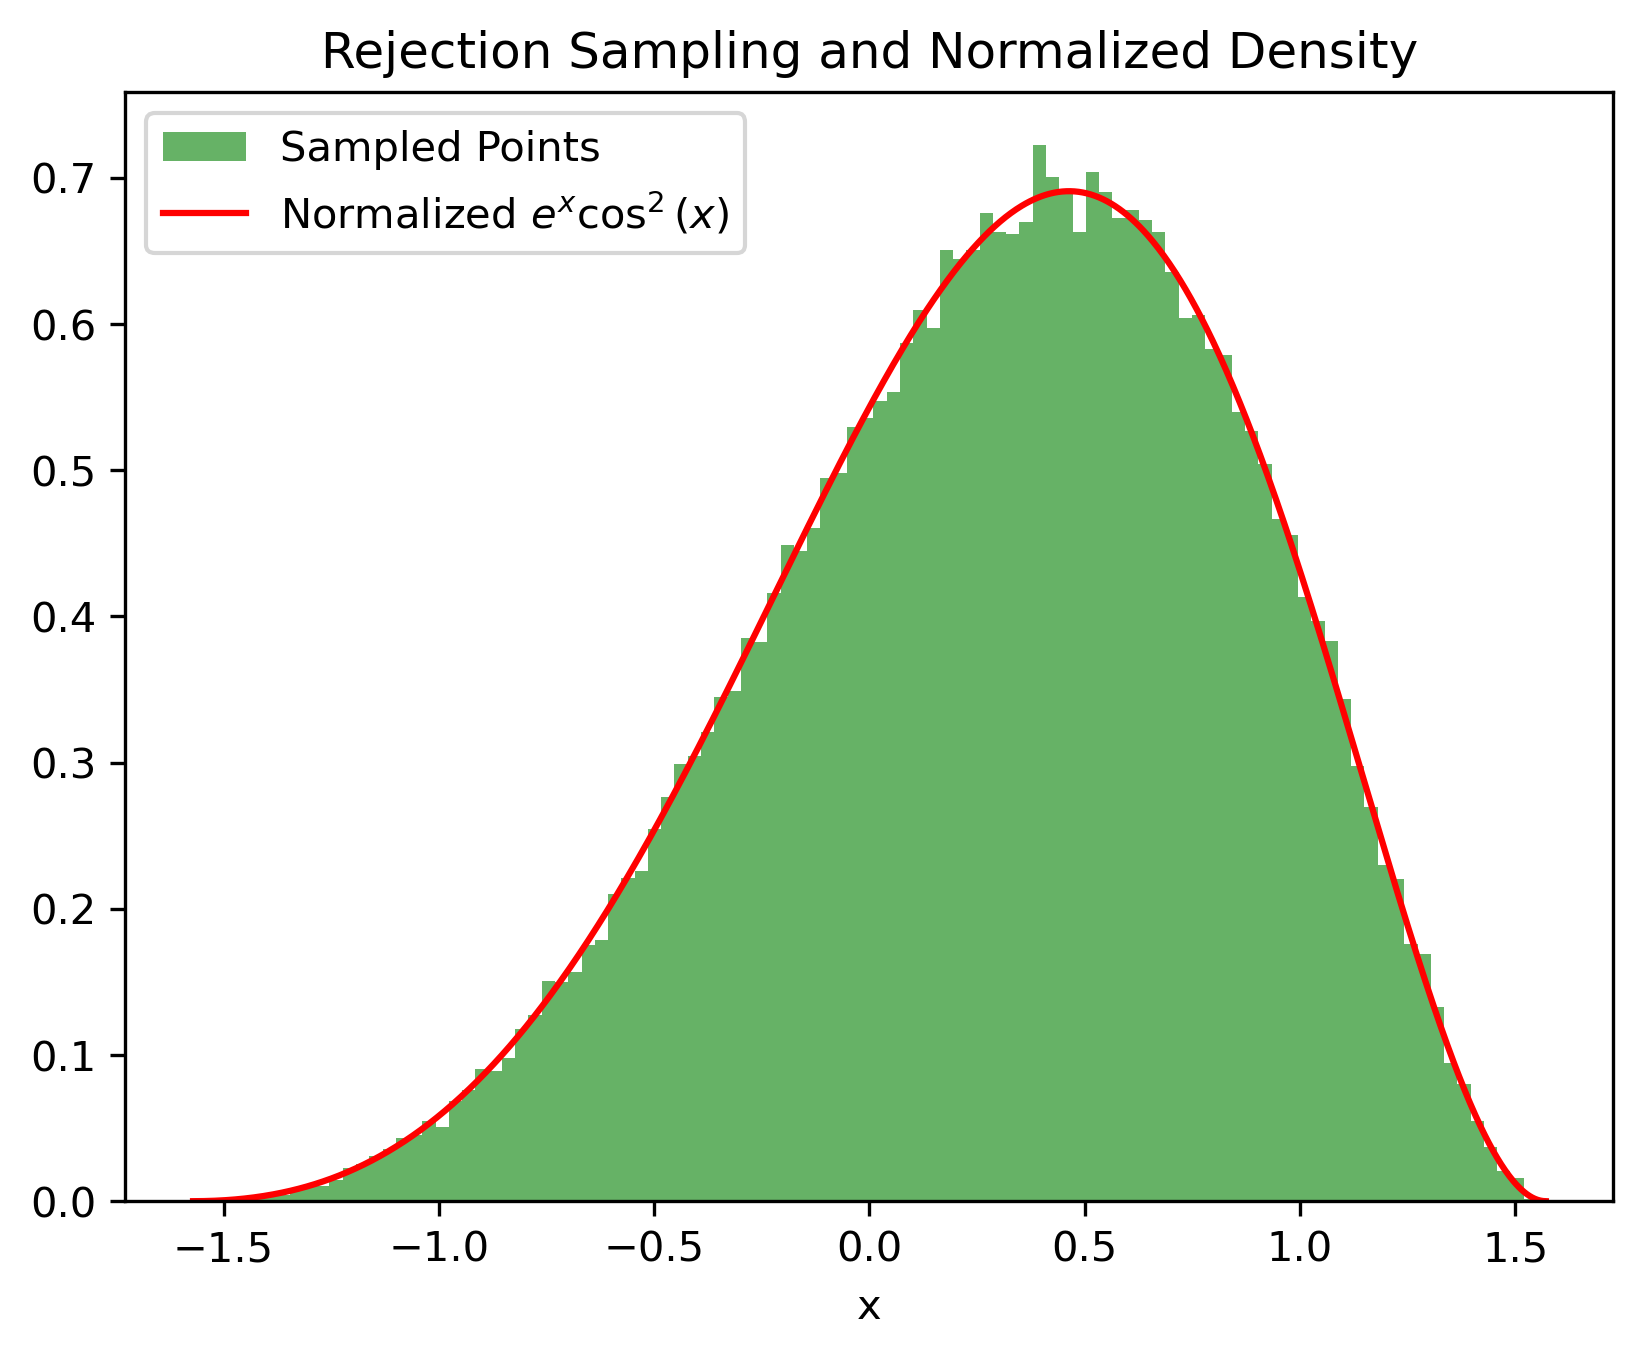

In [17]:
plt.hist(samples, bins=100, density=True, label='Sampled Points', color='g', alpha=0.6)
plt.plot(x_values, f_norm(x_values), label=r'Normalized $e^x \cos^2(x)$', color='r')

plt.xlabel('x')
plt.title('Rejection Sampling and Normalized Density')
plt.legend()
plt.show()

И вот теперь мы можем наблюдать, что, действительно, наша выборка является выборкой из распределения с функцией плотности $f_\text{norm}(x)$.

Ниже показаны ещё примеры работы данной реализации метода *rejection sampling*.

##### Пример 1

$$f(x) = 2 \cdot 6 x (1 - x) \cdot \mathbb{I}_{[0,\,1]}$$

$$g(x) \equiv 1 \cdot \mathbb{I}_{[0,\,1]}$$

Здесь $f(x)$ - это удвоенная функция плотности бета-распределения с параметрами $\alpha = 2,\ \beta = 2$.

![Rejection Image](./cache/rejection1.png)

##### Пример 2

$$f(x) = |\sin x \cdot e^{-\frac{x}{5}}| \cdot \mathbb{I}_{[0,\,10]}$$

$$g(x) \equiv \frac{1}{10} \cdot \mathbb{I}_{[0,\,10]}$$

![Rejection Image](./cache/rejection2.png)

### Problem 7
Model and depict a sample of 500 points uniformly distributed within a given triangle without using a selection method.

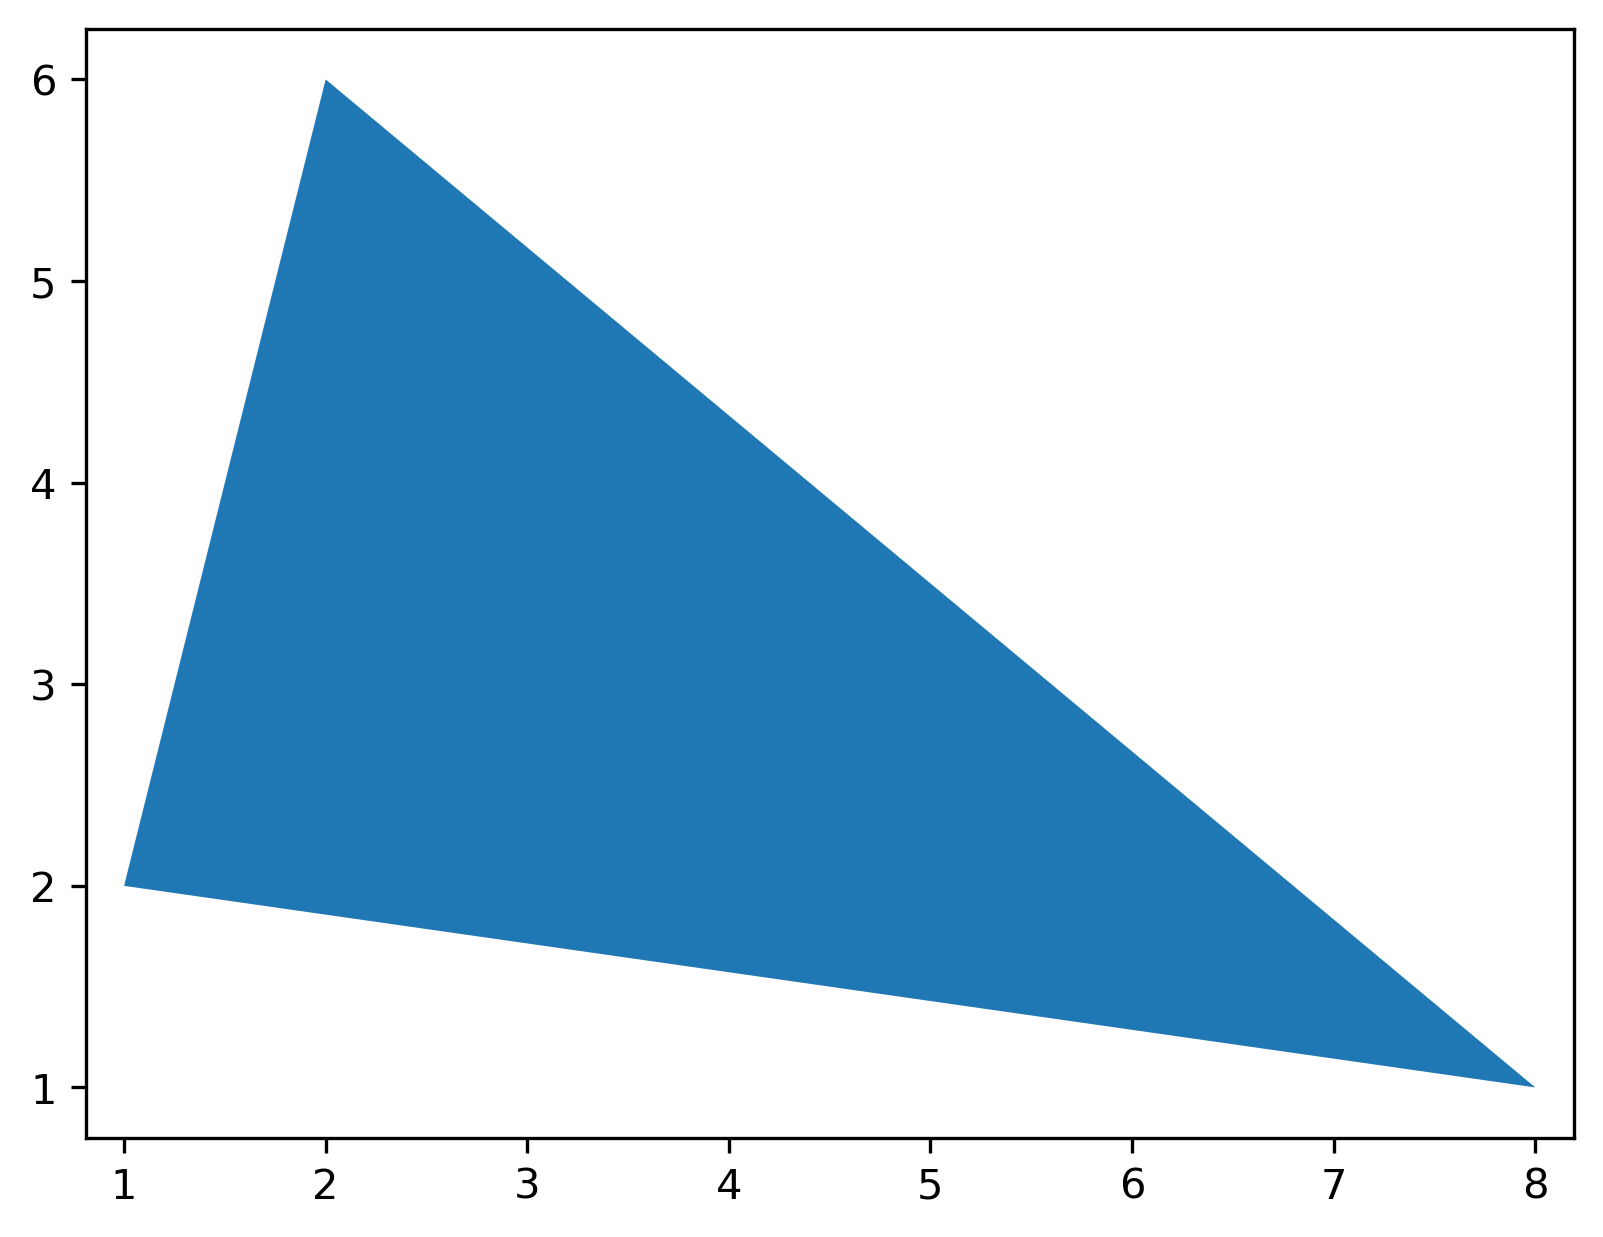

In [18]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()

polygon = Polygon(xy=np.array([[1, 2], [2, 6], [8, 1]]), closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

#### Решение

Каждую точку треугольника можно задать в [барицентрических координатах](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D1%80%D0%B8%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82%D1%8B) двумя параметрами $\,u\,$ и $\,v\,$ такими, что $u \geq 0,\ v \geq 0,\ u + v \leq 1$.

Возьмём случайную величину $Z$ с равномерным распределением в этих координатах, т.е. её функция плотности

$$f_{Z} (u, v) = 2 \cdot \mathbb{I}_{\,u\,\geq\,0,\ v\,\geq\,0,\ u\,+\,v\,\leq\,1}$$

Переход к декартовым координатам имеет вид

$$x = (1 - u - v) x_1 + u x_2 + v x_3,$$

$$y = (1 - u - v) y_1 + u y_2 + v y_3,$$

где $(x_1,\,y_1), (x_2,\,y_2), (x_3,\,y_3)$ - вершины треугольника.

Это линейное преобразование, а значит его якобиан есть некоторая константа $\ \Rightarrow\ $ $f_{X,\,Y} (x, y)$ будет равняться константе на некоторый индикатор $\ \Rightarrow\ $ $(X,Y)$ будет также иметь равномерное распределение.

Но как же получить такую $Z$?

Пусть $U$ и $V$ - независимые равномерно распределённые на $[0,\,1]$. Положим

$$Z = (\widetilde{U}, \widetilde{V}) = g(U, V),$$

где

$$g(u,\,v) = \begin{cases} (u,\,v), & u + v \leq 1 \\ (1-u,\,1-v), & u + v \gt 1 \end{cases}$$

У каждой точки $(\widetilde{u},\,\widetilde{v}),\,\widetilde{u} \geq 0,\,\widetilde{v} \geq 0,\, \widetilde{u} + \widetilde{v} \leq 1,$ есть два прообраза (ну разве что кроме тех, которые лежат на диагонали) $\,g_1^{-1} (\widetilde{u},\,\widetilde{v}) = (u,\,v)\,$ и $\,g_2^{-1} (\widetilde{u},\,\widetilde{v}) = (1-u,\,1-v)$. Тогда

$$f_Z (\widetilde{u},\,\widetilde{v}) = f_{\widetilde{U},\,\widetilde{V}} (\widetilde{u},\,\widetilde{v}) = f_{U,\,V}(g_1^{-1} (\widetilde{u},\,\widetilde{v})) \cdot |J_{g_1^{-1}}| + f_{U,\,V}(g_2^{-1} (\widetilde{u},\,\widetilde{v})) \cdot |J_{g_2^{-1}}| = 2 \cdot \mathbb{I}_{\,\widetilde{u}\,\geq\,0,\ \widetilde{v}\,\geq\,0,\ \widetilde{u}\,+\,\widetilde{v}\,\leq\,1},$$

что и требовалось.

Итак, случайную точку будем генерировать следующим образом:
   1. Генерируем два числа $\,u\,$ и $\,v$.
   2. Если $u + v \gt 1$, то заменяем  $\,u\,$  на  $\,1 - u\,$  и  $\,v\,$  на  $\,1 - v$.
   3. Вычисляем декартовы координаты нашей точки $P = (1 - u - v)\cdot A + u\cdot B + v\cdot C$, где $A,\,B,\,C$ - вершины треугольника.

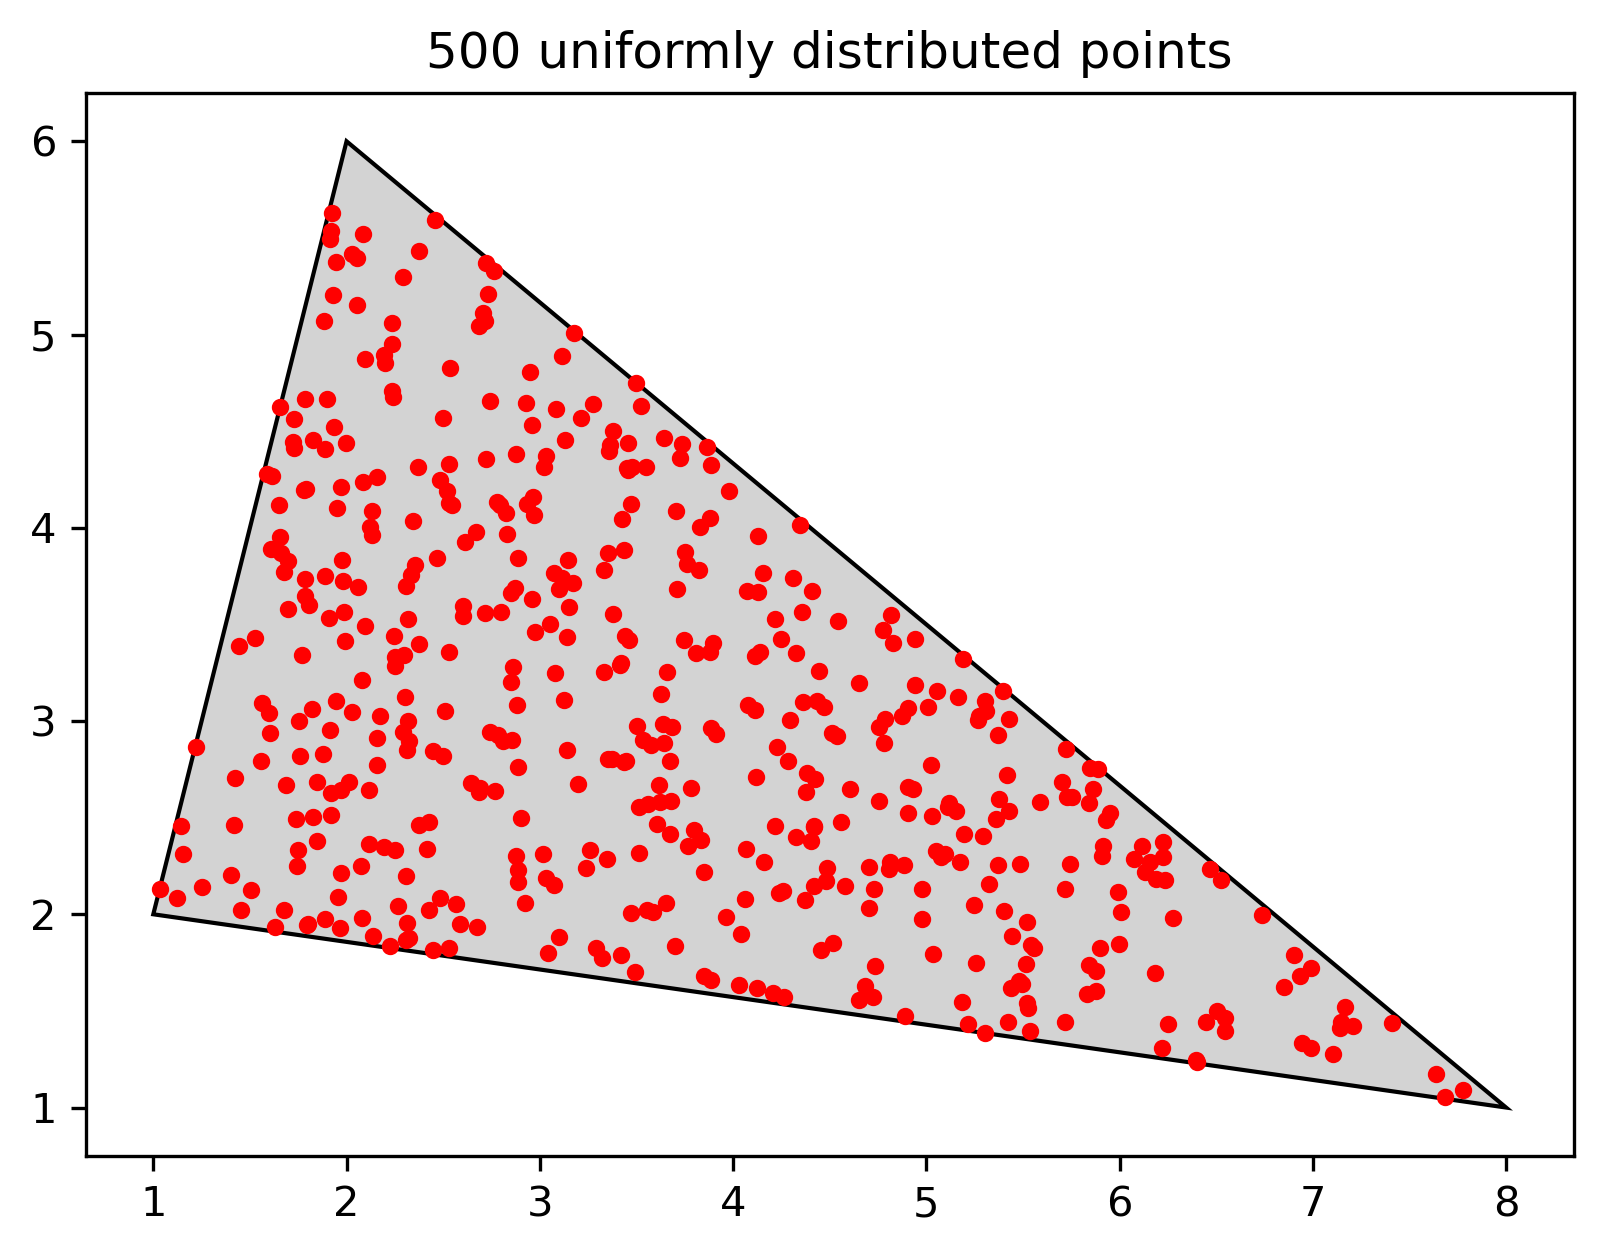

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def generate_points_in_triangle(triangle_vertices, quantity):
    A, B, C = triangle_vertices
    points = []
    
    for _ in range(quantity):
        u = np.random.rand()
        v = np.random.rand()
        if u + v > 1:
            u = 1 - u
            v = 1 - v
        
        point = (1 - u - v) * A + u * B + v * C
        points.append(point)
    
    return np.array(points)

triangle_vertices = np.array([[1, 2], [2, 6], [8, 1]])

points = generate_points_in_triangle(triangle_vertices, 500)

fig, ax = plt.subplots()
polygon = Polygon(triangle_vertices, closed=True, edgecolor='black', facecolor='lightgray')
ax.add_patch(polygon)
ax.scatter(points[:, 0], points[:, 1], color='red', s=10)

ax.set_aspect('equal')
plt.title("500 uniformly distributed points")
plt.show()


### Problem 8
Model without using the selection method a sample of $500$ points uniformly distributed inside the unit circle. Picture the obtained points. Do they really fill the circle uniformly?

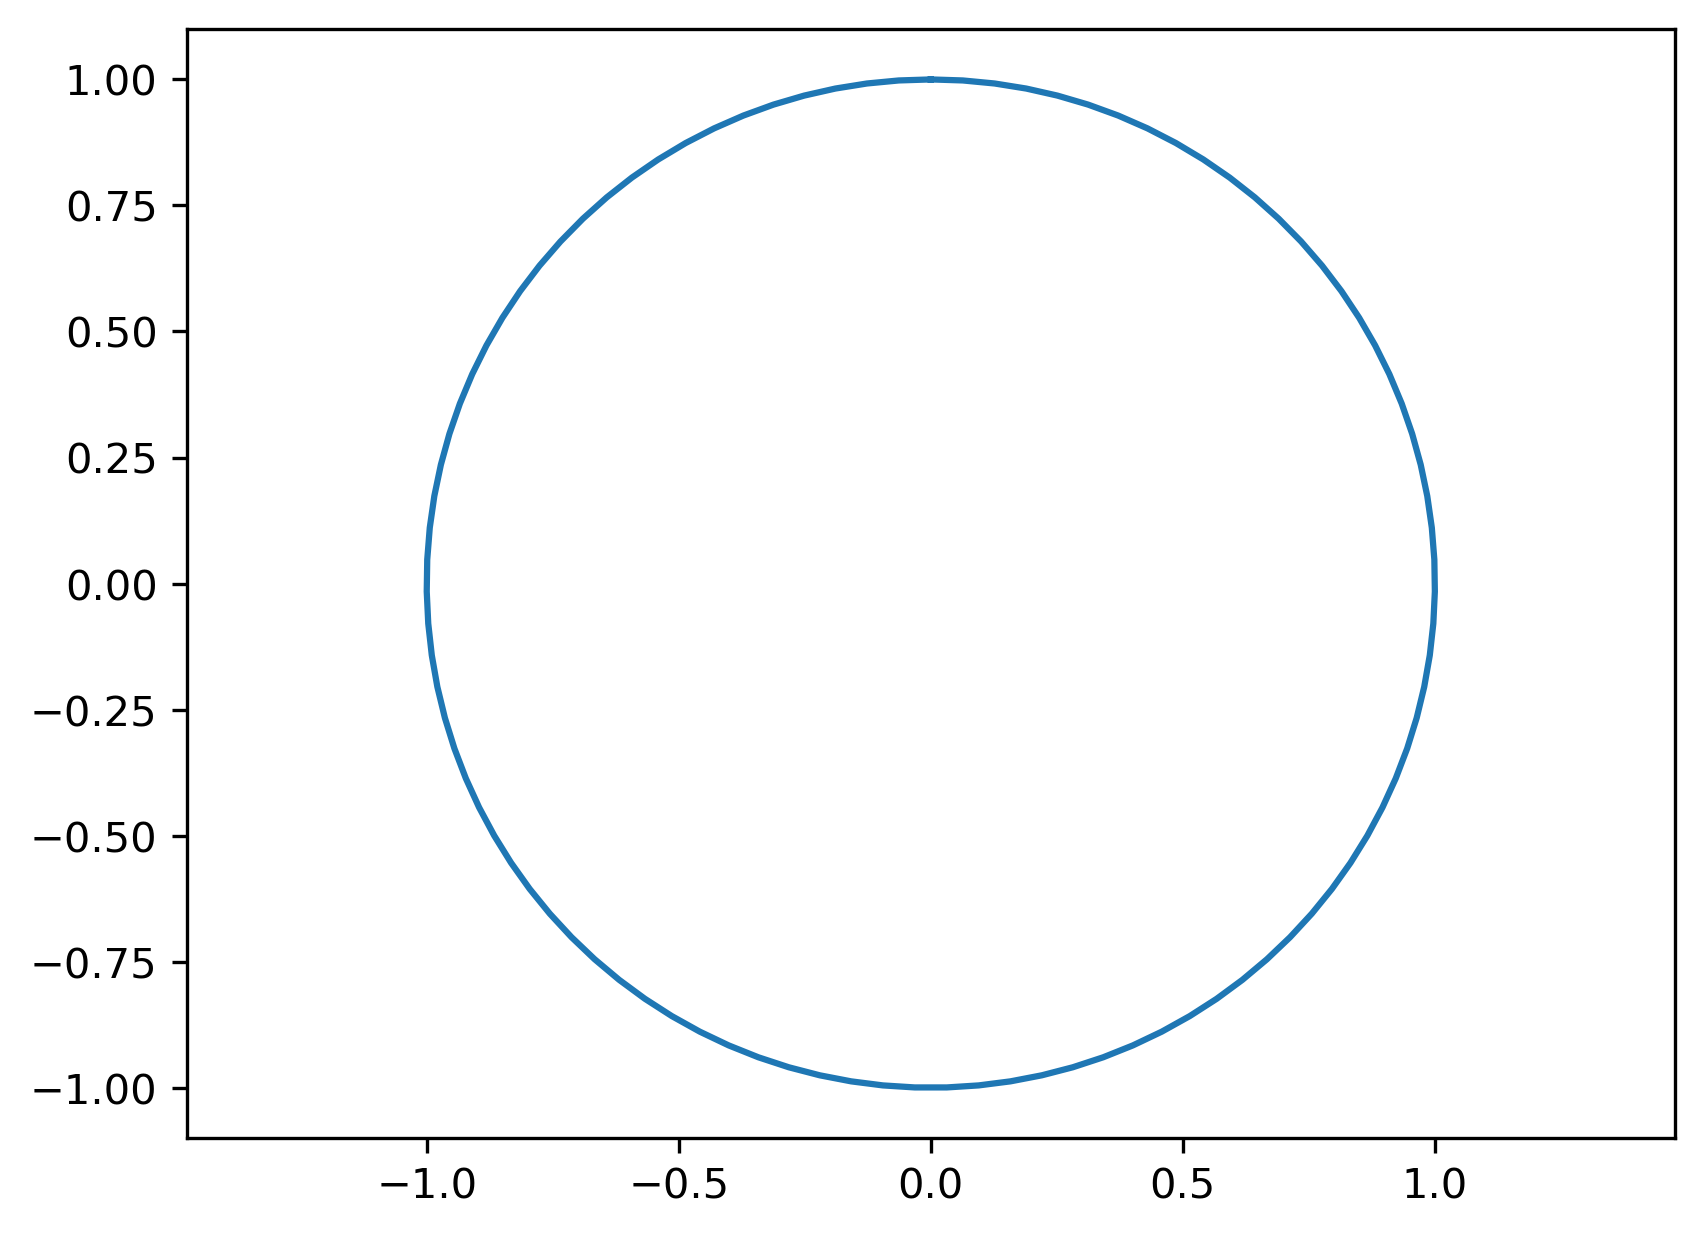

In [20]:
fig = plt.figure()

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

#### Решение

Первое, что приходит на ум, - это взять полярные координаты $(R, \Phi)$, где

$$R \sim U[0,\,1], \\ \Phi \sim U[0, 2\pi),$$

и затем перейти к декартовым координатам

$$X = R \cdot \cos \Phi, \\ Y = R \cdot \sin \Phi.$$

Попробуем и посмотрим, что получится.

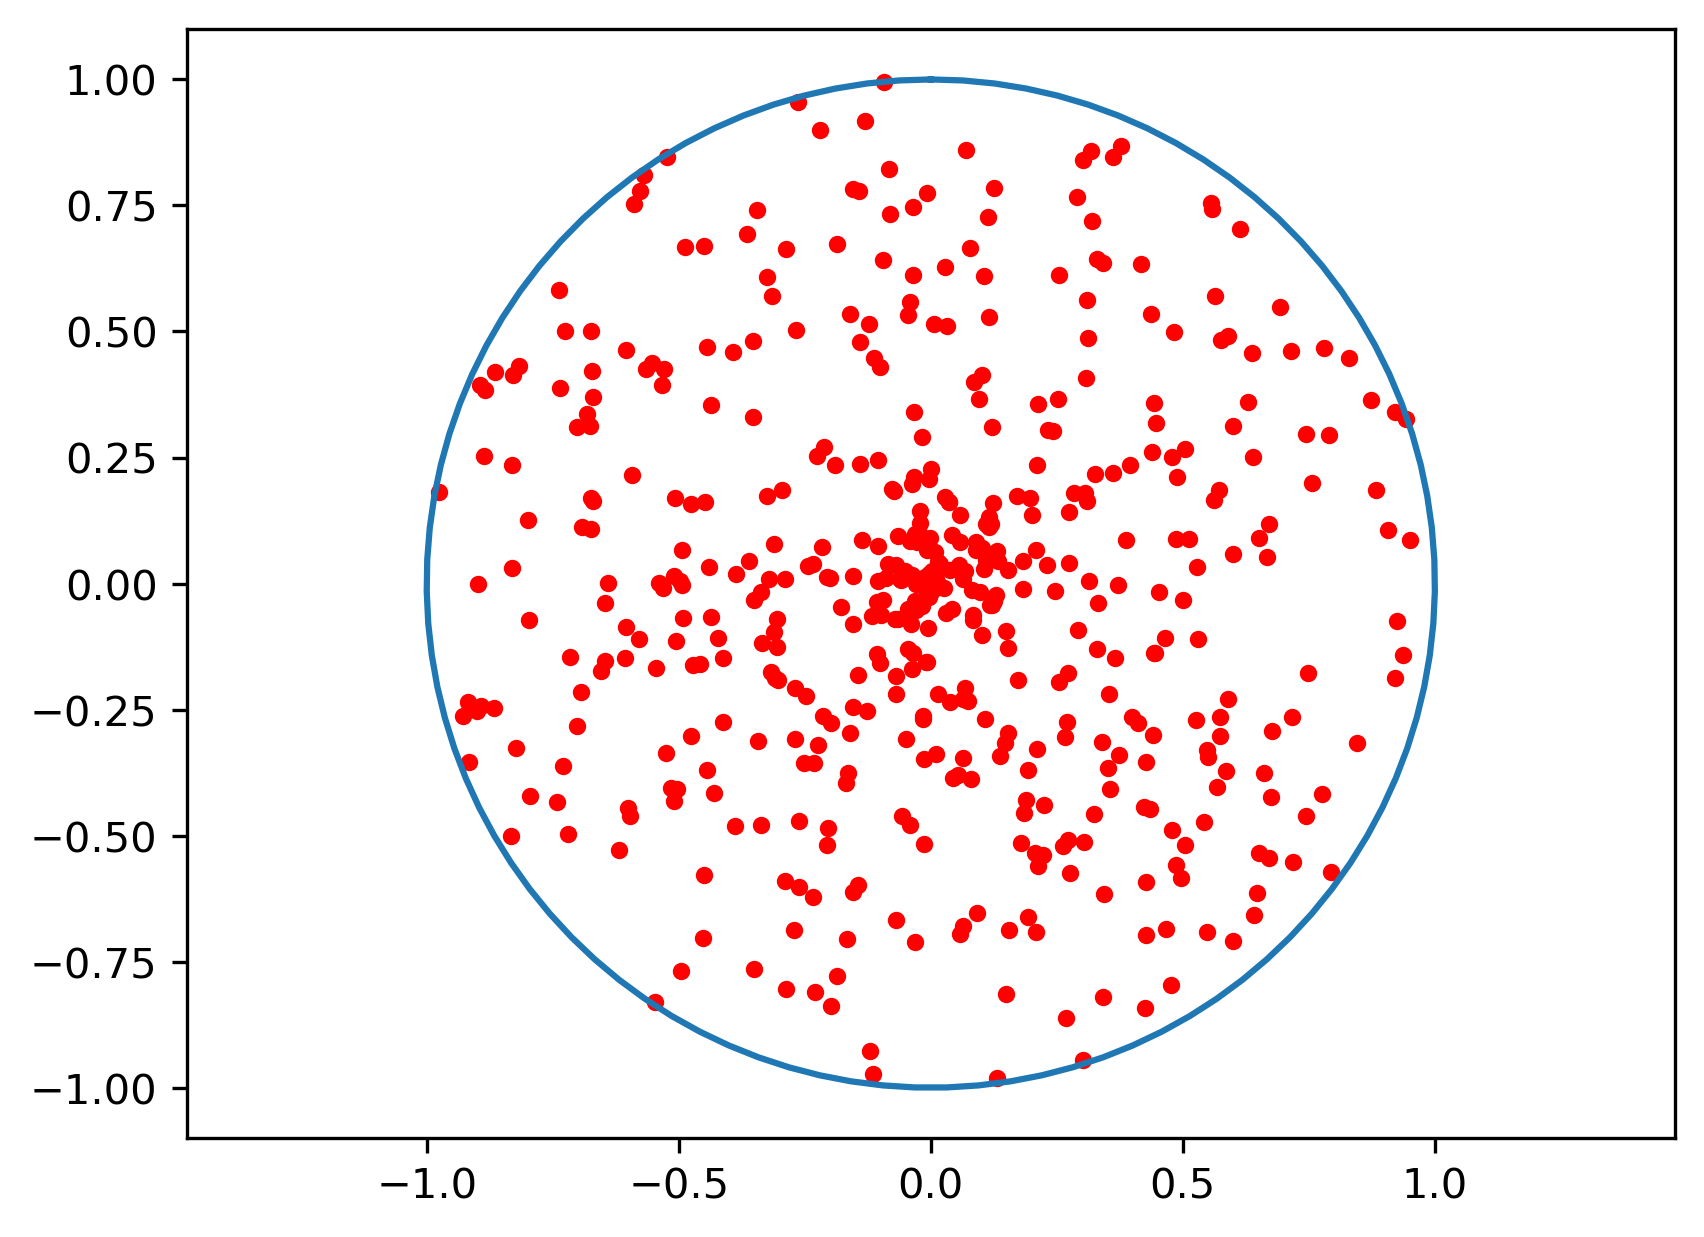

In [21]:
r = np.random.uniform(0, 1, 500)
phi = np.random.uniform(0, 2 * np.pi, 500)

x = r * np.cos(phi)
y = r * np.sin(phi)

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.scatter(x, y, color='r', s=10)

plt.axis('equal')
plt.show()

Видно, что ближе к центру точки расположены как-то более плотно. Посмотрим, какой вид имеет функция плотности у $(X, Y)$.

$$f_{R,\,\Phi} (r, \phi) = f_{R} (r) \cdot f_{\Phi} (\phi) = 1 \cdot \frac{1}{2\pi} = \frac{1}{2\pi},\ r \in [0,\,1],\ \phi \in [0,\,2\pi)$$

$$(X, Y) = g(R, \Phi) = (R \cdot \cos \Phi,\, R \cdot \sin \Phi)$$

$$f_{X,\,Y} (x, y) = f_{R,\,\Phi} (g^{-1} (x, y)) \cdot |J_{g^{-1} (x,\,y)}| = \frac{1}{2\pi \sqrt{x^2 + y^2}},\ \sqrt{x^2+y^2} \leq 1$$

Получается, что на самом деле $(X, Y)$ не равномерно распределено в единичной окружности. Но что, если мы сначала перейдём к

$$(\widetilde{R},\,\widetilde{\Phi}) = h(R,\,\Phi) = (\sqrt{R},\,\Phi),$$

а уже потом перейдём к декартовым?

$$X = \widetilde{R} \cdot \cos \widetilde{\Phi}, \\ Y = \widetilde{R} \cdot \sin \widetilde{\Phi}.$$

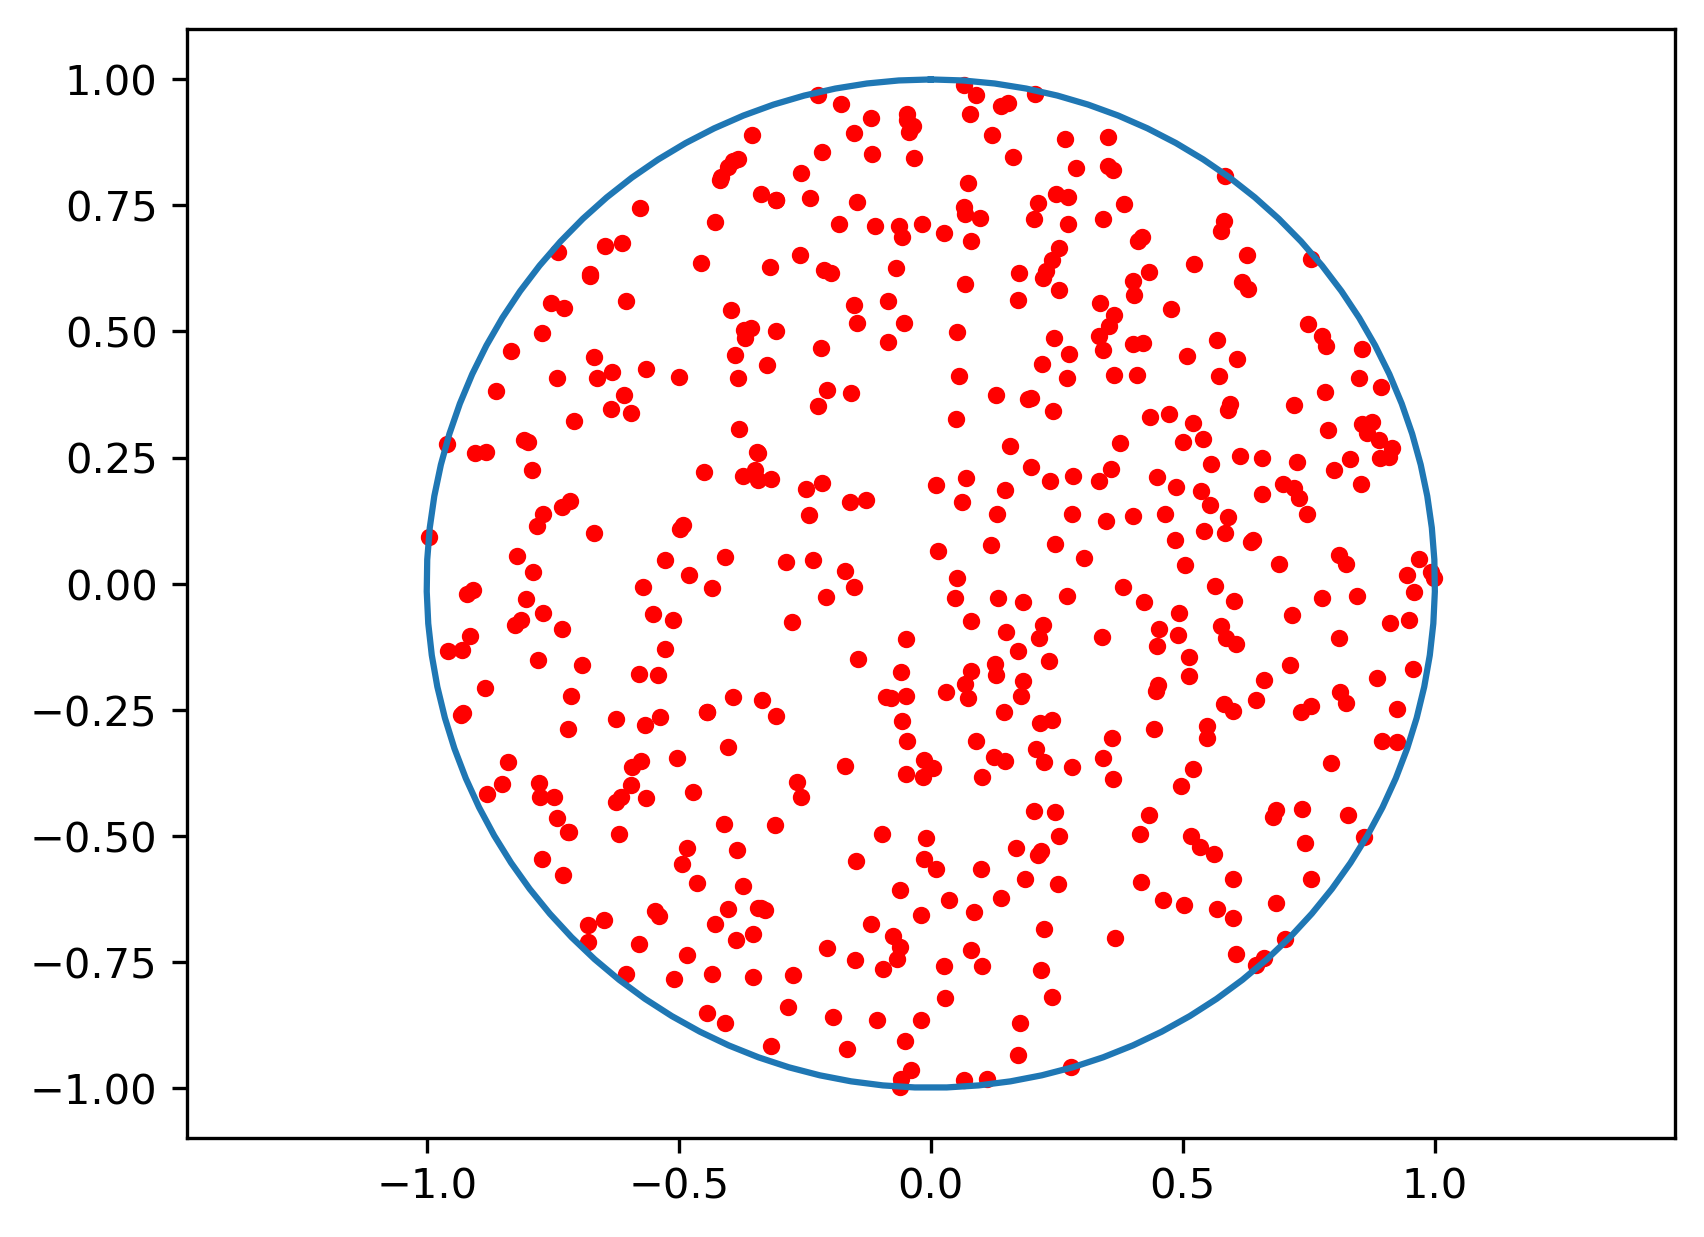

In [22]:
r = np.sqrt(np.random.uniform(0, 1, 500))
phi = np.random.uniform(0, 2 * np.pi, 500)

x = r * np.cos(phi)
y = r * np.sin(phi)

t = np.linspace(0, 2*np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.scatter(x, y, color='r', s=10)

plt.axis('equal')
plt.show()

Вот это уже и есть равномерное распределение. Посмотрим на математическое обоснование:

$$f_{\widetilde{R},\,\widetilde{\Phi}} (\widetilde{r}, \widetilde{\phi}) = f_{R,\,\Phi} (h^{-1} (\widetilde{r}, \widetilde{\phi})) \cdot |J_{h^{-1} (\widetilde{r}, \widetilde{\phi})}| = \frac{\widetilde{r}}{\pi},\ \widetilde{r} \in [0,\,1],\ \widetilde{\phi} \in [0,\,2\pi)$$

$$(X, Y) = g(\widetilde{R},\,\widetilde{\Phi}) = (\widetilde{R} \cdot \cos \widetilde{\Phi},\, \widetilde{R} \cdot \sin \widetilde{\Phi})$$

$$f_{X,\,Y} (x, y) = f_{\widetilde{R},\,\widetilde{\Phi}} (g^{-1} (x, y)) \cdot |J_{g^{-1} (x,\,y)}| = \frac{\sqrt{x^2+y^2}}{\pi} \cdot \frac{1}{\sqrt{x^2+y^2}} = \frac{1}{\pi},\ \sqrt{x^2+y^2} \leq 1$$

То есть мы в точности получили равномерное распределение в единичном круге! $:)$

### Problem 9
Prove (orally) that the following algorithm (**Box-Muller algorithm**, https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform) generates a sample of independent $\mathcal{N}(0,1)$ random variables. Modify the method to exclude calls of trigonometric functions `np.sin` and `np.cos`. Using the modified method, simulate a sample size of $1000$ from a $2D$ Gaussian distribution with mean $\mu$ and covariance matrix $\Sigma$, where
$$\mu = \begin{pmatrix} 4 \\ 7 \end{pmatrix}^T, \quad \Sigma = \begin{pmatrix} 20 & -4 \\ -4 & 40 \end{pmatrix}.$$
Construct a 2D histogram of the resulting distribution. Compare the sample mean and covariance matrix with the exact values.

In [23]:
import seaborn as sns

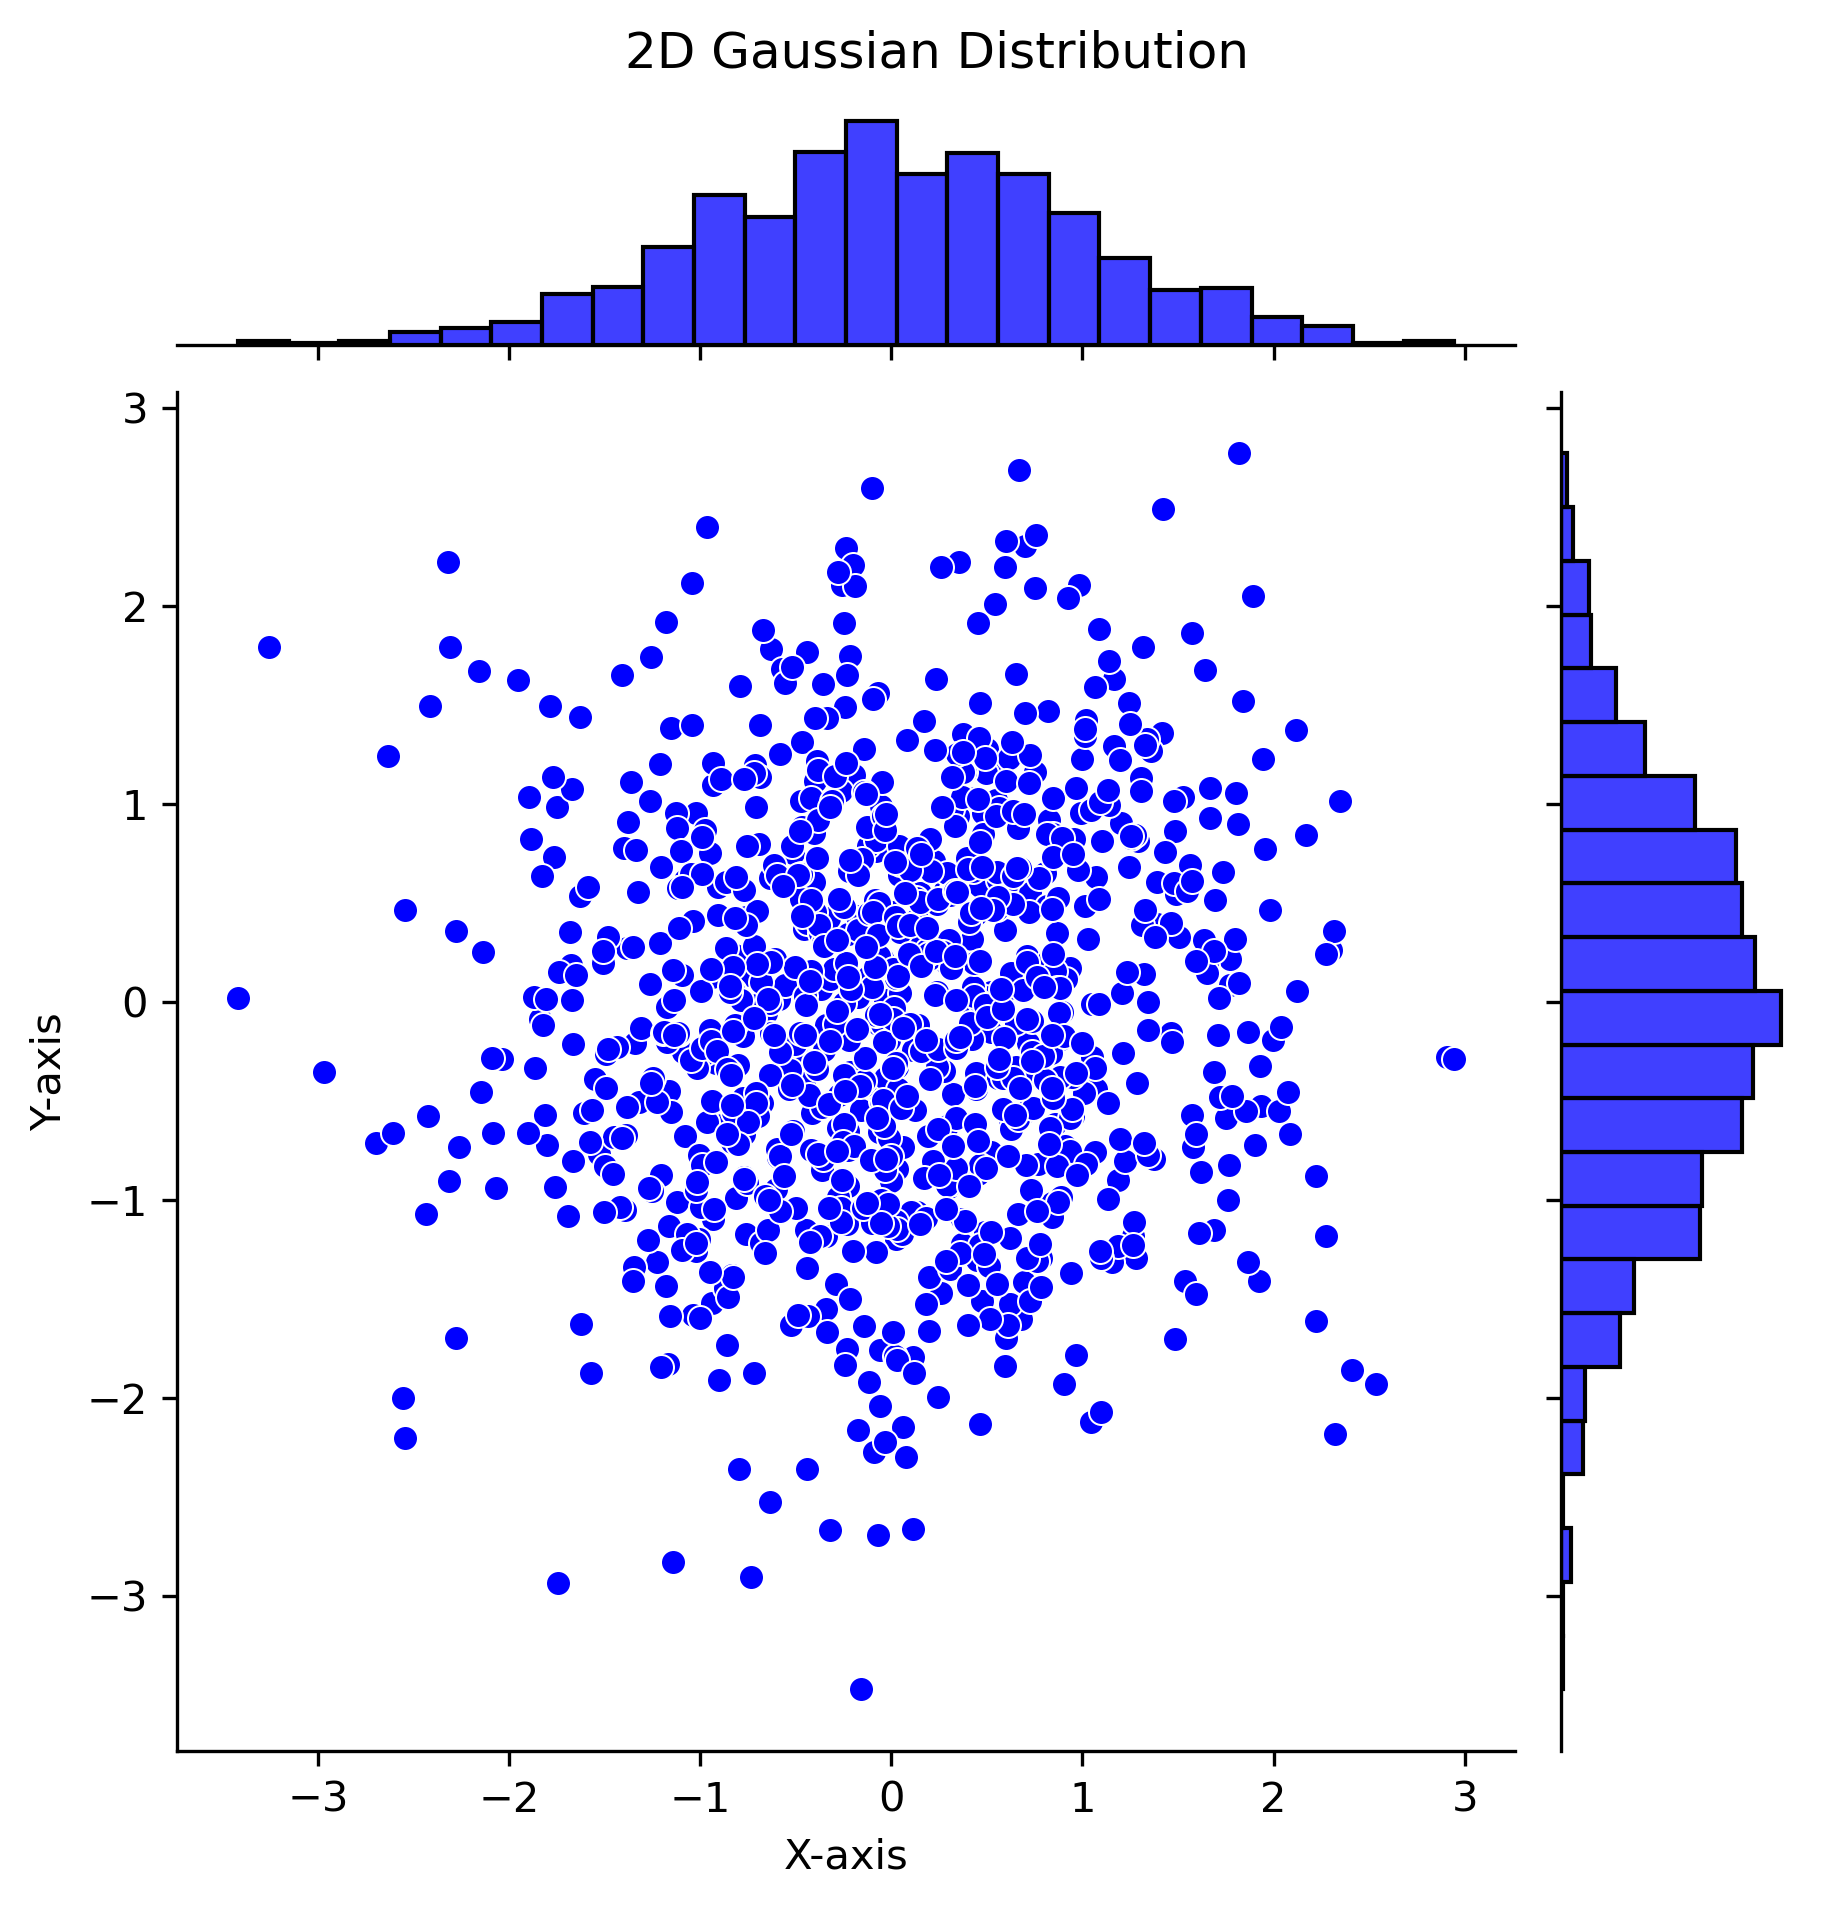

In [24]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)


joint_plot = sns.jointplot(x=x, y=y, color="blue")
joint_plot.set_axis_labels('X-axis', 'Y-axis')
plt.suptitle('2D Gaussian Distribution', y=1.02)
plt.show()

#### Решение

Пусть $U$ и $V$ независимы и равномерно распределены на $[0,\,1]$.

Чтобы доказать метод Бокса-Мюллера, найдём плотность $(X,Y)$, где 

$$ X = \sqrt{-2\ln{U}} \cos{(2\pi V)}, \\ Y = \sqrt{-2\ln{U}} \sin{(2\pi V)}.$$

Сначала выразим $U$ и $V$ через $X$ и $Y$:

$$U = e^{-\frac{X^2+Y^2}{2}}, \\ V = \frac{1}{2\pi} \arccos (\frac{X}{\sqrt{X^2+Y^2}})$$

Далее находим якобиан:

$$|J_{g^{-1} (x,\,y)}| = \frac{1}{|J_{g (u,\,v)}|}$$

$$|J_{g (u,\,v)}| = \begin{vmatrix}
-\frac{1}{u \sqrt{-2 \ln{u}}} \cos (2\pi v) & -2\pi \sqrt{-2 \ln{u}} \sin (2\pi v) \\
-\frac{1}{u \sqrt{-2 \ln{u}}} \sin (2\pi v) & 2\pi \sqrt{-2 \ln{u}} \cos (2\pi v)
\end{vmatrix} = \frac{2\pi}{u}\ \ \Rightarrow\ \ |J_{g^{-1} (x,\,y)}| = \frac{1}{2\pi} e^{-\frac{x^2+y^2}{2}}$$

И наконец находим плотность:

$$f_{X,\,Y} (x, y) = f_{U, V} (g^{-1} (x, y)) \cdot |J_{g^{-1} (x,\,y)}| = 1 \cdot \frac{1}{2\pi} e^{-\frac{x^2+y^2}{2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{y^2}{2}}$$

Т.е. $X$ и $Y$ - независимы и имеют стандартное нормальное распределение $\mathcal{N}(0,\,1)$, что и требовалось.

Про то, как модифицировать метод, чтобы не использовать `np.sin` и `np.cos`, хорошо рассказано в википедии, поэтому повторять это здесь я не буду.

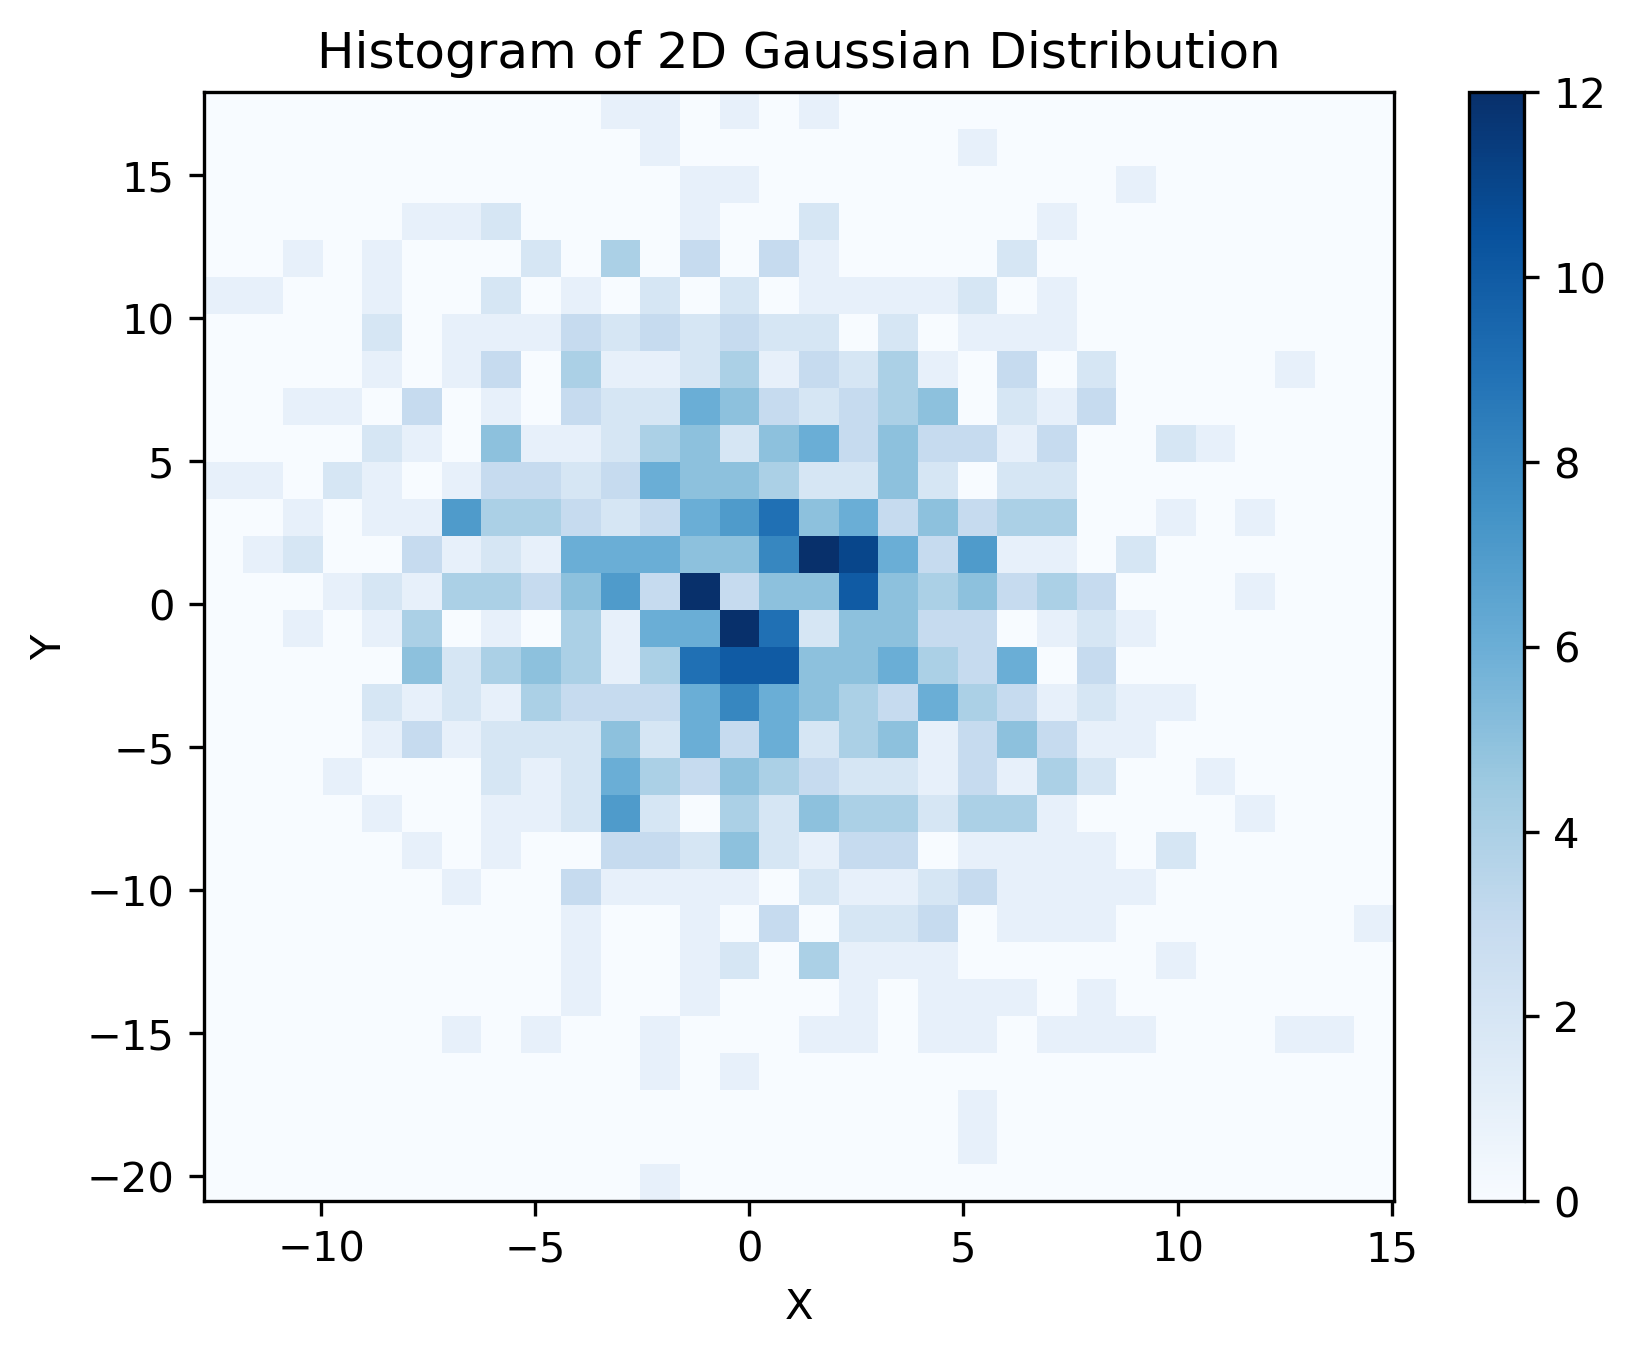

Sample mean:
 0.383159
-0.049406

Theoretical mean:
0.571429
0.142857

Sample covariance matrix:
20.380184 -4.491251
-4.491251 39.396261

Theoretical covariance matrix:
20 -4
-4 40


In [25]:
mu = np.array([4/7, 1/7])
sigma = np.array([[20, -4], [-4, 40]])
 
z = []
while len(z) < 1000:
    u = np.random.uniform(-1, 1)
    v = np.random.uniform(-1, 1)

    s = u**2 + v**2
    if s == 0 or s >= 1:
        continue

    z.append([u * np.sqrt(-2.0 * np.log(s) / s), v * np.sqrt(-2.0 * np.log(s) / s)])

z = np.dot(z, np.linalg.cholesky(sigma).T) + mu

plt.hist2d(z[:, 0], z[:, 1], bins=30, cmap='Blues')

plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Histogram of 2D Gaussian Distribution')
plt.show()

print(f'Sample mean:\n{pd.DataFrame(np.mean(z, axis=0)).to_string(index=False, header=False)}')
print(f'\nTheoretical mean:\n{pd.DataFrame(mu).to_string(index=False, header=False)}')
print(f'\nSample covariance matrix:\n{pd.DataFrame(np.cov(z.T)).to_string(index=False, header=False)}')
print(f'\nTheoretical covariance matrix:\n{pd.DataFrame(sigma).to_string(index=False, header=False)}')


### Problem 10*

Implement a method of generating a random partition of an n-element set into subsets. Use it to estimate the expected number of subsets in a random partition of a set of 100 elements.

Hint 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Hint 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

#### Решение

Весь метод описан в [Hint 2](http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/), поэтому комментировать здесь нечего.

Поскольку случайная величина $K$ может принимать сколь угодно большие значения, то мы должны её ограничить, чтобы посчитать. В данном случае я ограничил до $150$, т.к. если мы рассмотрим

$$P(K = k) = \frac{k^{100}}{k!\cdot e \cdot B_{100}}$$

как функцию от $k$, то максимум достигается при $k \approx 29.42$, поэтому даже для $k \geq 60$ вероятность уже ну слишком мала.

Для подсчёта ожидаемого числа элементов разбиения я просто $10000$ раз его сгенерировал и вычислил среднее значение. Думаю, можно посчитать точное мат. ожидание числа различных $C_i$, но я этого делать не стал $($и в задании этого не требуется $:))$.

In [26]:
def bell_number(n):
    bell = [0] * (n + 1)
    bell[0] = 1
    
    for i in range(1, n + 1):
        bell[i] = 0
        for j in range(i):
            bell[i] += math.comb(i - 1, j) * bell[j]
    
    return bell[n]

def generate_K(n, K_max):
    Bn = bell_number(n)

    probabilities = []
    for k in range(1, K_max + 1):
        P_K_k = (k**n) / (math.factorial(k) * math.exp(1) * Bn)
        probabilities.append(P_K_k)
    
    K = np.random.choice(range(1, K_max + 1), p=probabilities)
    
    return K

def generate_P(n, K_max):
    K = generate_K(n, K_max)
    C = [np.random.randint(1, K) for _ in range(n)]
    
    P = {}
    for i in range(n):
        if C[i] not in P:
            P[C[i]] = []
        P[C[i]].append(i)
    
    return P

n = 100
K_max = 150
P = generate_P(n, K_max)

for i, subset in sorted(P.items()):
    print(f'Subset {i}: {subset}')

def estimate_expected_num_of_subsets(n, num_trials=10000):
    subset_counts = []

    for _ in range(num_trials):
        P = generate_P(n, K_max)
        subset_counts.append(len(P))
    
    expected_num_of_subsets = sum(subset_counts) / len(subset_counts)
    return expected_num_of_subsets

expected_num_of_subsets = estimate_expected_num_of_subsets(n)
print(f'\nExpected number of subsets for n = 100: {expected_num_of_subsets}')

Subset 1: [16, 43, 60, 68]
Subset 2: [46, 56, 90, 93, 96, 98]
Subset 3: [65, 70]
Subset 4: [7, 18, 22, 45, 73, 88]
Subset 5: [59]
Subset 6: [30, 32]
Subset 7: [48, 72, 82]
Subset 8: [20, 29, 75, 87]
Subset 9: [0, 2, 9, 14, 55, 61, 79]
Subset 10: [40, 69]
Subset 11: [52]
Subset 12: [64]
Subset 13: [62, 81]
Subset 14: [39, 42, 83]
Subset 15: [6, 26, 67, 76, 92]
Subset 16: [3, 44, 58, 74]
Subset 17: [4, 15, 41, 80]
Subset 18: [13, 19, 77, 94]
Subset 19: [23, 36, 78, 97]
Subset 20: [1, 31, 35, 91]
Subset 21: [17, 38, 49, 51, 53, 57, 84]
Subset 22: [24]
Subset 23: [21, 85]
Subset 24: [27]
Subset 25: [33, 54, 66]
Subset 26: [8, 50, 71]
Subset 27: [11, 34, 99]
Subset 28: [5, 12, 28, 37, 63, 86]
Subset 29: [10, 25, 47, 89, 95]

Expected number of subsets for n = 100: 27.8265
